# EDA,FE & Logistic Regression on Algerian Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df=pd.read_csv(r"C:\Users\Suyash\Downloads\Algerian_forest_fires_dataset_UPDATE.csv",skiprows=1)

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [4]:
df[121:130]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
125,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire
126,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire
127,04,06,2012,30,64,14,0,79.4,5.2,15.4,2.2,5.6,1,not fire
128,05,06,2012,32,60,14,0.2,77.1,6,17.6,1.8,6.5,0.9,not fire
129,06,06,2012,35,54,11,0.1,83.7,8.4,26.3,3.1,9.3,3.1,fire


In [5]:
df.drop([122,123],inplace=True)
df.reset_index(inplace=True)
df.drop('index',inplace=True,axis=1)

In [6]:
df[121:130]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
123,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire
124,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire
125,04,06,2012,30,64,14,0,79.4,5.2,15.4,2.2,5.6,1,not fire
126,05,06,2012,32,60,14,0.2,77.1,6,17.6,1.8,6.5,0.9,not fire
127,06,06,2012,35,54,11,0.1,83.7,8.4,26.3,3.1,9.3,3.1,fire
128,07,06,2012,35,44,17,0.2,85.6,9.9,28.9,5.4,10.7,6,fire
129,08,06,2012,28,51,17,1.3,71.4,7.7,7.4,1.5,7.3,0.8,not fire


In [7]:
df.loc[:122,'region'] = 'bejaia'
df.loc[122:,'region'] = 'sidi-Bel Abbes'

In [8]:
df[117:127]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
117,26,09,2012,31,54,11,0,82,6,16.3,2.5,6.2,1.7,not fire,bejaia
118,27,09,2012,31,66,11,0,85.7,8.3,24.9,4,9,4.1,fire,bejaia
119,28,09,2012,32,47,14,0.7,77.5,7.1,8.8,1.8,6.8,0.9,not fire,bejaia
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire,bejaia
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire,bejaia
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,sidi-Bel Abbes
123,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire,sidi-Bel Abbes
124,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire,sidi-Bel Abbes
125,04,06,2012,30,64,14,0,79.4,5.2,15.4,2.2,5.6,1,not fire,sidi-Bel Abbes
126,05,06,2012,32,60,14,0.2,77.1,6,17.6,1.8,6.5,0.9,not fire,sidi-Bel Abbes


# Datatypes & describe

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4    RH          244 non-null    object
 5    Ws          244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      243 non-null    object
 14  region       244 non-null    object
dtypes: object(15)
memory usage: 28.7+ KB


In [10]:
df.dtypes

day            object
month          object
year           object
Temperature    object
 RH            object
 Ws            object
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
Classes        object
region         object
dtype: object

In [11]:
df.describe(include='all')

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
count,244,244,244,244,244,244,244,244,244,244,244,244,244,243,244
unique,31,4,1,19,62,18,39,173,166,198,106,174,127,8,2
top,01,07,2012,35,64,14,0,88.9,7.9,8,1.1,3,0.4,fire,bejaia
freq,8,62,244,29,10,43,133,8,5,5,8,5,12,131,122


In [12]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'region'],
      dtype='object')

# Data-cleaning

In [13]:
df.columns=[i.strip() for i in df.columns]
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')

In [14]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,bejaia
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,bejaia
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,bejaia
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,bejaia
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,bejaia


In [15]:
df=df.astype(str)

In [16]:
df['Classes'].value_counts()

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
nan                1
not fire           1
Name: Classes, dtype: int64

In [17]:
df['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'nan', 'not fire    '], dtype=object)

In [18]:
df[df['Classes']=='nan'].index

Int64Index([165], dtype='int64')

In [19]:
df.loc[165,'Classes']='fire'

In [20]:
df['Classes'].value_counts()

fire             131
not fire         101
fire               5
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

In [21]:
df['Classes']=df['Classes'].str.replace(" ","")

In [22]:
df['FWI'].unique()

array(['0.5', '0.4', '0.1', '0', '2.5', '7.2', '7.1', '0.3', '0.9', '5.6',
       '7.1 ', '0.2', '1.4', '2.2', '2.3', '3.8', '7.5', '8.4', '10.6',
       '15', '13.9', '3.9', '12.9', '1.7', '4.9', '6.8', '3.2', '8',
       '0.6', '3.4', '0.8', '3.6', '6', '10.9', '4', '8.8', '2.8', '2.1',
       '1.3', '7.3', '15.3', '11.3', '11.9', '10.7', '15.7', '6.1', '2.6',
       '9.9', '11.6', '12.1', '4.2', '10.2', '6.3', '14.6', '16.1',
       '17.2', '16.8', '18.4', '20.4', '22.3', '20.9', '20.3', '13.7',
       '13.2', '19.9', '30.2', '5.9', '7.7', '9.7', '8.3', '0.7', '4.1',
       '1', '3.1', '1.9', '10', '16.7', '1.2', '5.3', '6.7', '9.5', '12',
       '6.4', '5.2', '3', '9.6', '4.7', 'fire   ', '14.1', '9.1', '13',
       '17.3', '30', '25.4', '16.3', '9', '14.5', '13.5', '19.5', '12.6',
       '12.7', '21.6', '18.8', '10.5', '5.5', '14.8', '24', '26.3',
       '12.2', '18.1', '24.5', '26.9', '31.1', '30.3', '26.1', '16',
       '19.4', '2.7', '3.7', '10.3', '5.7', '9.8', '19.3', '17.5',

In [23]:
df['FWI'] = df['FWI'].str.replace(" ","")

In [24]:
df[df['FWI']=='fire'].index

Int64Index([165], dtype='int64')

In [25]:
#Taking the mode of FWI
df.loc[165,'FWI']='0.4'

In [26]:
#Label Encoding
df['Classes'] = df['Classes'].str.replace('notfire','0')
df['Classes'] = df['Classes'].str.replace('fire','1')

In [27]:
df['region'] = df['region'].str.replace('bejaia','0')
df['region'] = df['region'].str.replace('sidi-Bel Abbes','1')

In [28]:
df['DC'] = df['DC'].str.replace(" ","")

# Converting Categorical data into Numerical data

In [29]:
df['day'] = df['day'].astype(int)
df['month'] = df['month'].astype(int)
df['year'] = df['year'].astype(int)
df['Temperature'] = df['Temperature'].astype(int)
df['RH']    = df['RH'].astype(int)
df['Ws']    = df['Ws'].astype(int)
df['Rain']  = df['Rain'].astype(float)
df['FFMC']  = df['FFMC'].astype(float)
df['DMC']   = df['DMC'].astype(float)
df['DC']    = df['DC'].astype(float)
df['ISI']   = df['ISI'].astype(float)
df['BUI']   = df['BUI'].astype(float)
df['FWI']   = df['FWI'].astype(float)
df['Classes'] =df['Classes'].astype(float)
df['region'] =df['region'].astype(float)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int32  
 1   month        244 non-null    int32  
 2   year         244 non-null    int32  
 3   Temperature  244 non-null    int32  
 4   RH           244 non-null    int32  
 5   Ws           244 non-null    int32  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      244 non-null    float64
 14  region       244 non-null    float64
dtypes: float64(9), int32(6)
memory usage: 23.0 KB


In [31]:
df.dtypes

day              int32
month            int32
year             int32
Temperature      int32
RH               int32
Ws               int32
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes        float64
region         float64
dtype: object

In [32]:
df.shape

(244, 15)

In [33]:
df.isna().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
region         0
dtype: int64

# Creating a copy of dataset

In [34]:
data = df.copy()
data.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0.0,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0.0,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.0,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0.0,0.0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0.0,0.0


# Feature Information

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
   Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
   FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely â€œFireâ€ and â€œnot Fireâ€

# Statistical Analysis

In [35]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
count,244.000000,244.000000,244.0,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,15.754098,7.500000,2012.0,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.288484,4.774180,16.664754,7.008197,0.565574,0.500000
std,8.825059,1.112961,0.0,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,47.619393,4.175318,14.204824,7.437383,0.496700,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,13.275000,1.400000,6.000000,0.700000,0.000000,0.000000
50%,16.000000,7.500000,2012.0,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.250000,4.200000,1.000000,0.500000
75%,23.000000,8.000000,2012.0,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.300000,22.525000,11.375000,1.000000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000,1.000000


In [36]:
df.cov()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
day,7.788167e+01,4.641920e-16,0.0,3.071308,-9.747689,1.165621,-1.980908,28.346758,53.654328,221.859379,6.548769,64.839034,23.032065,0.884504,2.924044e-17
month,4.641920e-16,1.238683e+00,0.0,-0.238683,-0.627572,-0.129630,0.078601,0.248560,0.938477,6.766276,0.286626,1.356790,0.696296,0.012346,0.000000e+00
year,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
Temperature,3.071308e+00,-2.386831e-01,0.0,13.204817,-35.396782,-2.840215,-2.374270,35.297598,21.712423,64.113719,9.218043,23.512265,15.102287,0.935168,4.979424e-01
RH,-9.747689e+00,-6.275720e-01,0.0,-35.396782,221.539415,9.874739,6.635431,-137.785533,-74.580245,-156.174991,-42.920524,-73.700941,-63.152169,-3.216117,-3.030864e+00
Ws,1.165621e+00,-1.296296e-01,0.0,-2.840215,9.874739,7.897102,0.956129,-6.577727,-0.043306,10.204060,0.178913,1.187799,0.606139,-0.092862,-2.489712e-01
Rain,-1.980908e+00,7.860082e-02,0.0,-2.374270,6.635431,0.956129,3.997623,-15.595918,-7.135415,-28.259196,-2.897687,-8.496825,-4.800293,-0.376833,-4.115226e-02
FFMC,2.834676e+01,2.485597e-01,0.0,35.297598,-137.785533,-6.577727,-15.595918,205.565939,106.820535,344.048788,44.283138,120.090018,73.187426,5.484349,1.613992e+00
DMC,5.365433e+01,9.384774e-01,0.0,21.712423,-74.580245,-0.043306,-7.135415,106.820535,152.968382,515.551947,34.831449,172.536341,80.480590,3.588791,1.184156e+00
DC,2.218594e+02,6.766276e+00,0.0,64.113719,-156.174991,10.204060,-28.259196,344.048788,515.551947,2267.606583,99.199508,637.129111,262.143165,11.994976,-1.944053e+00


# Numerical & Categorical Feature

In [37]:
cat_col = [fea for fea in df.columns if [df[fea]=='o']]

In [38]:
for i in cat_col:
    print(df.groupby(i)['region'].value_counts())

day  region
1    0.0       4
     1.0       4
2    0.0       4
     1.0       4
3    0.0       4
              ..
29   1.0       4
30   0.0       4
     1.0       4
31   0.0       2
     1.0       2
Name: region, Length: 62, dtype: int64
month  region
6      0.0       30
       1.0       30
7      0.0       31
       1.0       31
8      0.0       31
       1.0       31
9      0.0       30
       1.0       30
Name: region, dtype: int64
year  region
2012  0.0       122
      1.0       122
Name: region, dtype: int64
Temperature  region
22           0.0        2
24           1.0        2
             0.0        1
25           0.0        6
26           0.0        4
             1.0        1
27           0.0        4
             1.0        4
28           1.0        8
             0.0        7
29           0.0       11
             1.0        7
30           1.0       12
             0.0       10
31           0.0       18
             1.0        7
32           0.0       14
             1.0   

<AxesSubplot:xlabel='Classes', ylabel='count'>

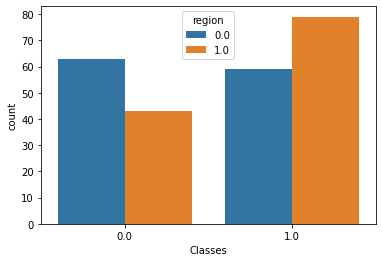

In [39]:
sns.countplot(data=df,x='Classes',hue='region')

In [40]:
num_col=[fea for fea in df.columns if [df[fea]!='o']]

In [41]:
df[num_col].nunique()

day             31
month            4
year             1
Temperature     19
RH              62
Ws              18
Rain            39
FFMC           173
DMC            166
DC             198
ISI            106
BUI            174
FWI            125
Classes          2
region           2
dtype: int64

# Segregating Discrete & Continous col

In [42]:
#we are assumning threshold as 32 if feature is lessthan 32 it is discrete
dist_fea = [fea for fea in num_col if len(df[fea].unique())<32]
dist_fea

['day', 'month', 'year', 'Temperature', 'Ws', 'Classes', 'region']

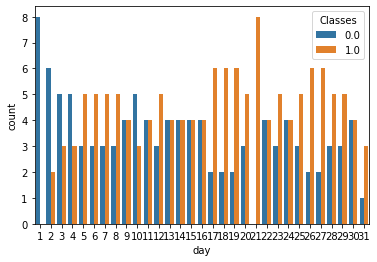

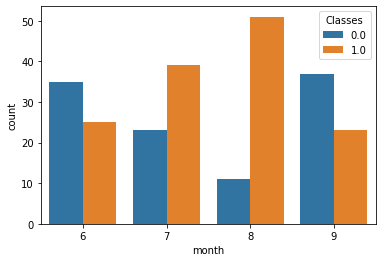

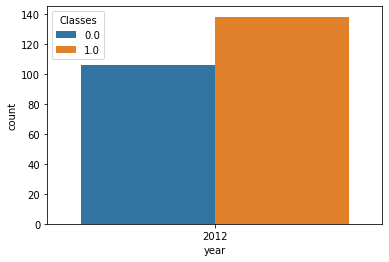

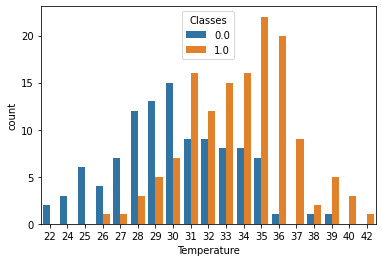

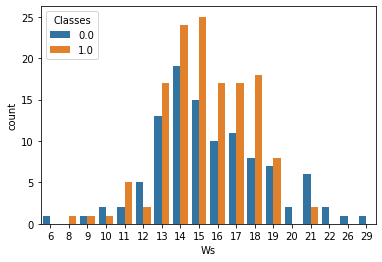

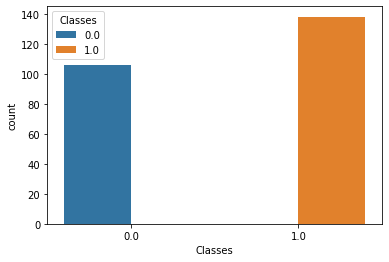

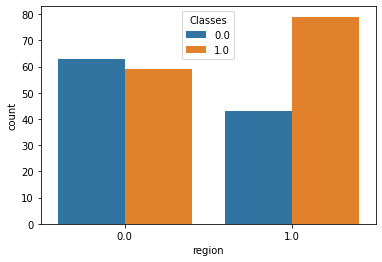

In [43]:
for fea in dist_fea:
    sns.countplot(data=df,x=fea,hue="Classes")
    plt.show()

In [44]:
cont_fea = [fea for fea in num_col if fea not in dist_fea]
cont_fea

['RH', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']

In [45]:
import scipy.stats as stats

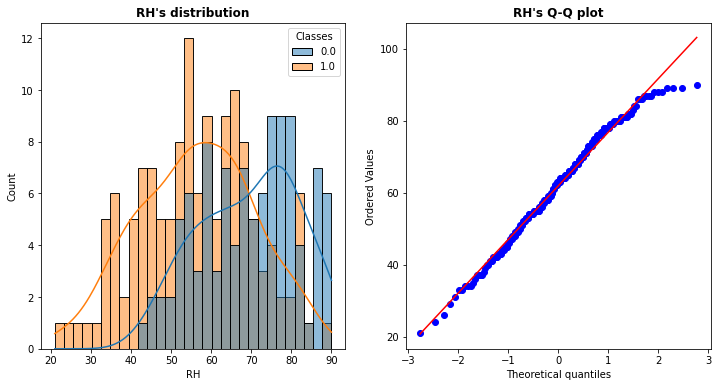

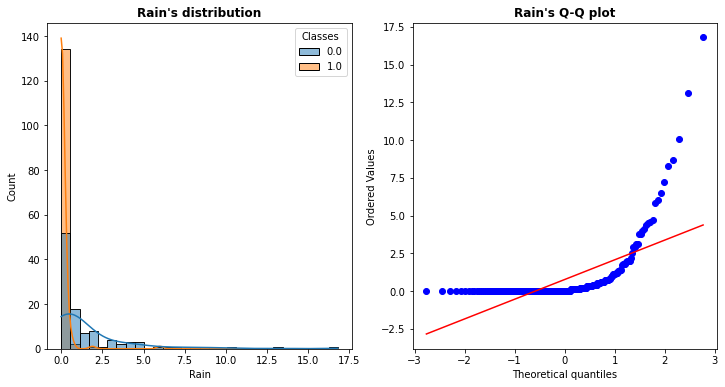

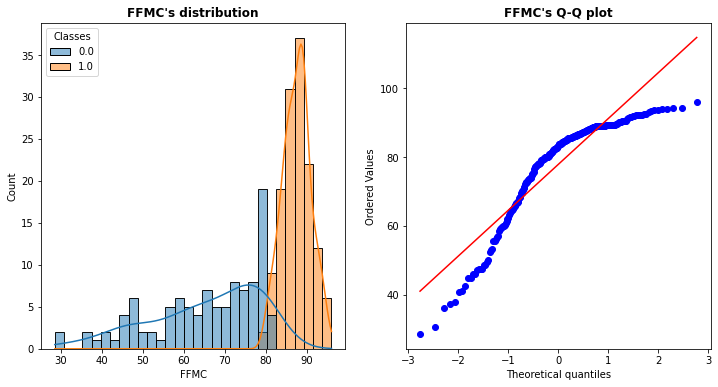

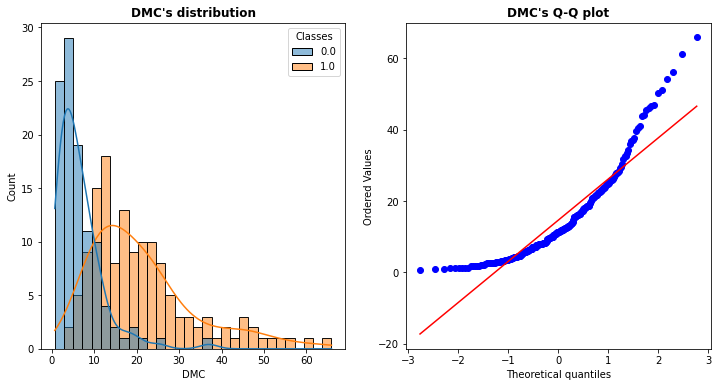

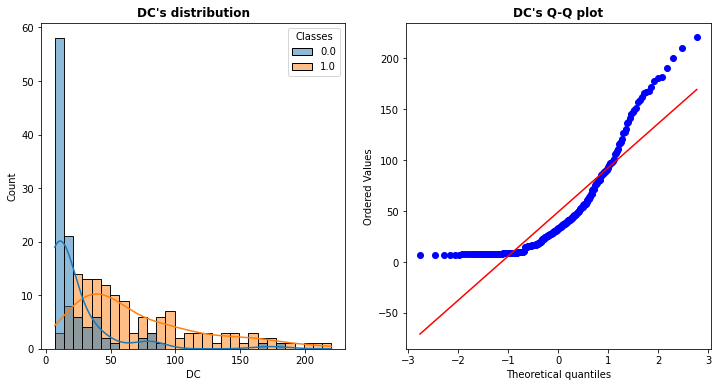

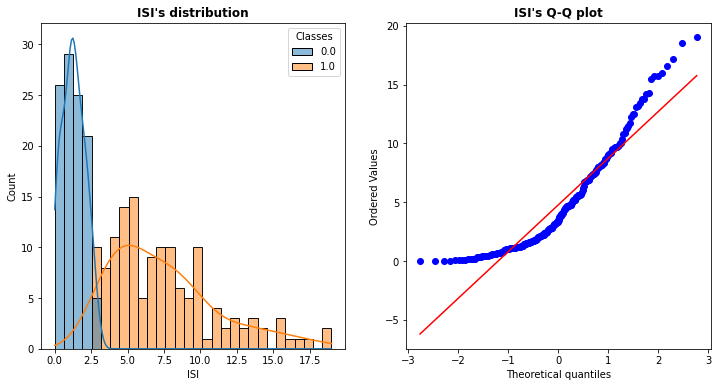

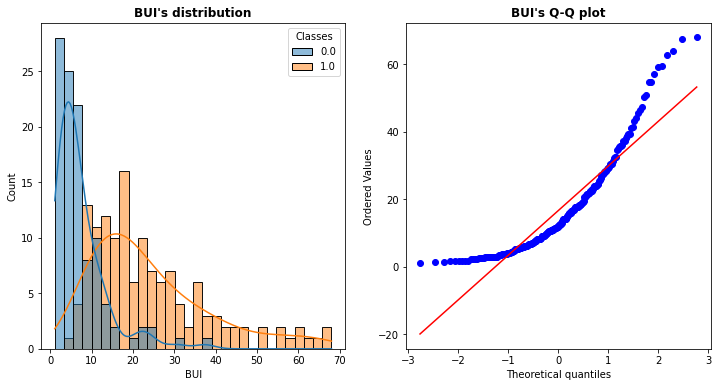

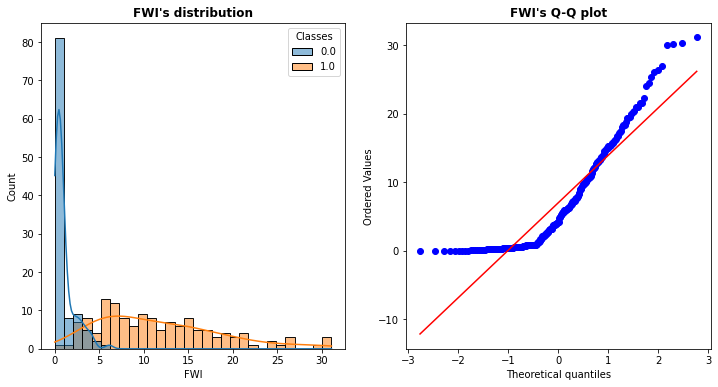

In [46]:
for i in cont_fea:
    plt.figure(figsize=(12,6))
    plt.subplot(121)
    sns.histplot(data=df,x=i,kde=True,hue='Classes',bins=30)
    plt.title("{}'s distribution".format(i),fontweight='bold')
    
    plt.subplot(122)
    stats.probplot(df[i],dist='norm',plot=plt)
    plt.title("{}'s Q-Q plot".format(i),fontweight='bold')

# Comparing Continous feature with region

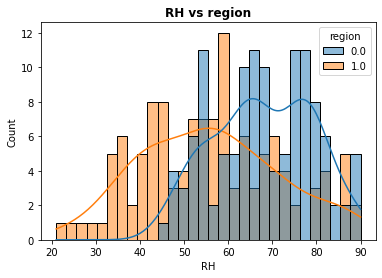

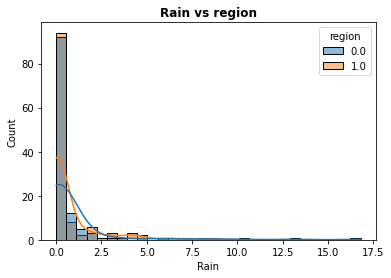

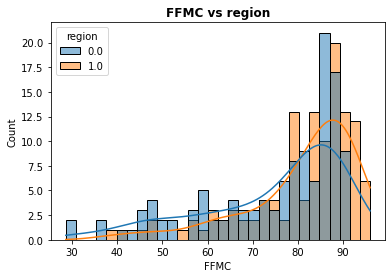

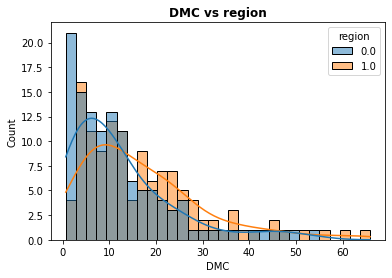

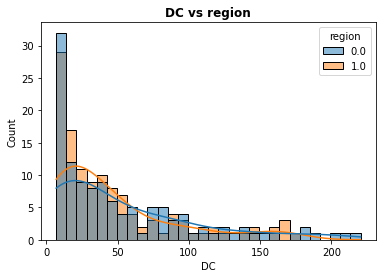

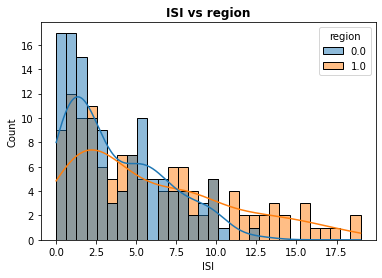

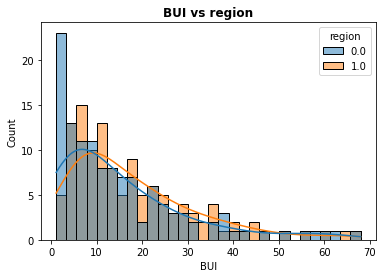

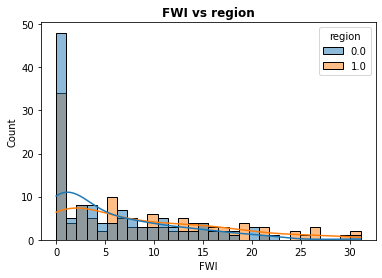

In [47]:
for fea in cont_fea:
    sns.histplot(data=df,x=fea,kde=True,bins=30,hue='region')
    plt.title("{} vs region".format(fea),fontweight='bold')
    plt.show()

# Checking for Outliers:

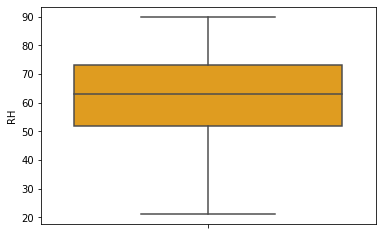

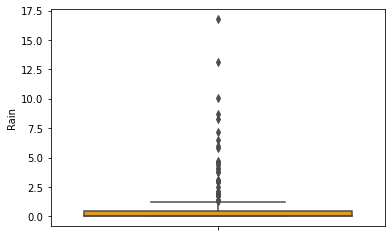

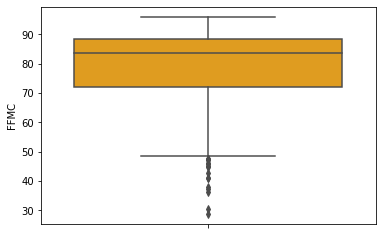

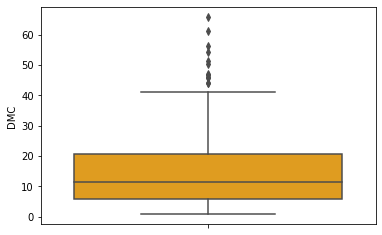

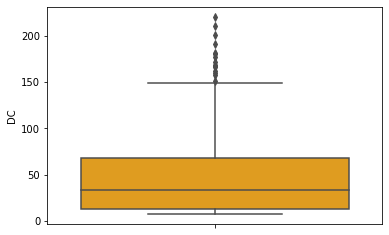

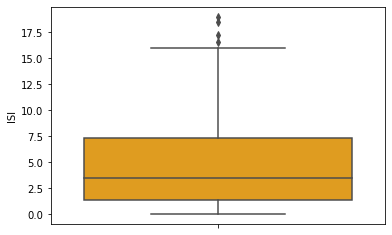

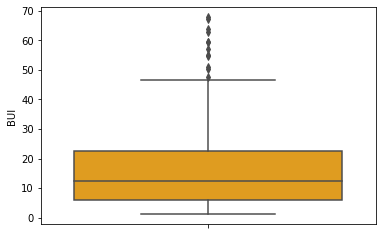

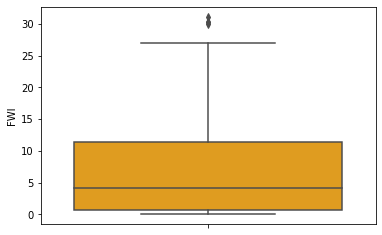

In [48]:
for fea in cont_fea:
    sns.boxplot(data=data,y=fea,color='orange')
    plt.show()

# Correlation for each Numrical feature

In [49]:
data.cov()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
day,7.788167e+01,4.641920e-16,0.0,3.071308,-9.747689,1.165621,-1.980908,28.346758,53.654328,221.859379,6.548769,64.839034,23.032065,0.884504,2.924044e-17
month,4.641920e-16,1.238683e+00,0.0,-0.238683,-0.627572,-0.129630,0.078601,0.248560,0.938477,6.766276,0.286626,1.356790,0.696296,0.012346,0.000000e+00
year,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
Temperature,3.071308e+00,-2.386831e-01,0.0,13.204817,-35.396782,-2.840215,-2.374270,35.297598,21.712423,64.113719,9.218043,23.512265,15.102287,0.935168,4.979424e-01
RH,-9.747689e+00,-6.275720e-01,0.0,-35.396782,221.539415,9.874739,6.635431,-137.785533,-74.580245,-156.174991,-42.920524,-73.700941,-63.152169,-3.216117,-3.030864e+00
Ws,1.165621e+00,-1.296296e-01,0.0,-2.840215,9.874739,7.897102,0.956129,-6.577727,-0.043306,10.204060,0.178913,1.187799,0.606139,-0.092862,-2.489712e-01
Rain,-1.980908e+00,7.860082e-02,0.0,-2.374270,6.635431,0.956129,3.997623,-15.595918,-7.135415,-28.259196,-2.897687,-8.496825,-4.800293,-0.376833,-4.115226e-02
FFMC,2.834676e+01,2.485597e-01,0.0,35.297598,-137.785533,-6.577727,-15.595918,205.565939,106.820535,344.048788,44.283138,120.090018,73.187426,5.484349,1.613992e+00
DMC,5.365433e+01,9.384774e-01,0.0,21.712423,-74.580245,-0.043306,-7.135415,106.820535,152.968382,515.551947,34.831449,172.536341,80.480590,3.588791,1.184156e+00
DC,2.218594e+02,6.766276e+00,0.0,64.113719,-156.174991,10.204060,-28.259196,344.048788,515.551947,2267.606583,99.199508,637.129111,262.143165,11.994976,-1.944053e+00


In [50]:
data = round(data[[feature for feature in num_col if feature not in ['day','month','year','region']]].corr(),2)
data

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
Temperature,1.00,-0.65,-0.28,-0.33,0.68,0.48,0.37,0.61,0.46,0.56,0.52
RH,-0.65,1.00,0.24,0.22,-0.65,-0.41,-0.22,-0.69,-0.35,-0.57,-0.44
Ws,-0.28,0.24,1.00,0.17,-0.16,-0.00,0.08,0.02,0.03,0.03,-0.07
Rain,-0.33,0.22,0.17,1.00,-0.54,-0.29,-0.30,-0.35,-0.30,-0.32,-0.38
FFMC,0.68,-0.65,-0.16,-0.54,1.00,0.60,0.50,0.74,0.59,0.69,0.77
DMC,0.48,-0.41,-0.00,-0.29,0.60,1.00,0.88,0.67,0.98,0.87,0.58
DC,0.37,-0.22,0.08,-0.30,0.50,0.88,1.00,0.50,0.94,0.74,0.51
ISI,0.61,-0.69,0.02,-0.35,0.74,0.67,0.50,1.00,0.64,0.91,0.74
BUI,0.46,-0.35,0.03,-0.30,0.59,0.98,0.94,0.64,1.00,0.86,0.58
FWI,0.56,-0.57,0.03,-0.32,0.69,0.87,0.74,0.91,0.86,1.00,0.71


<AxesSubplot:>

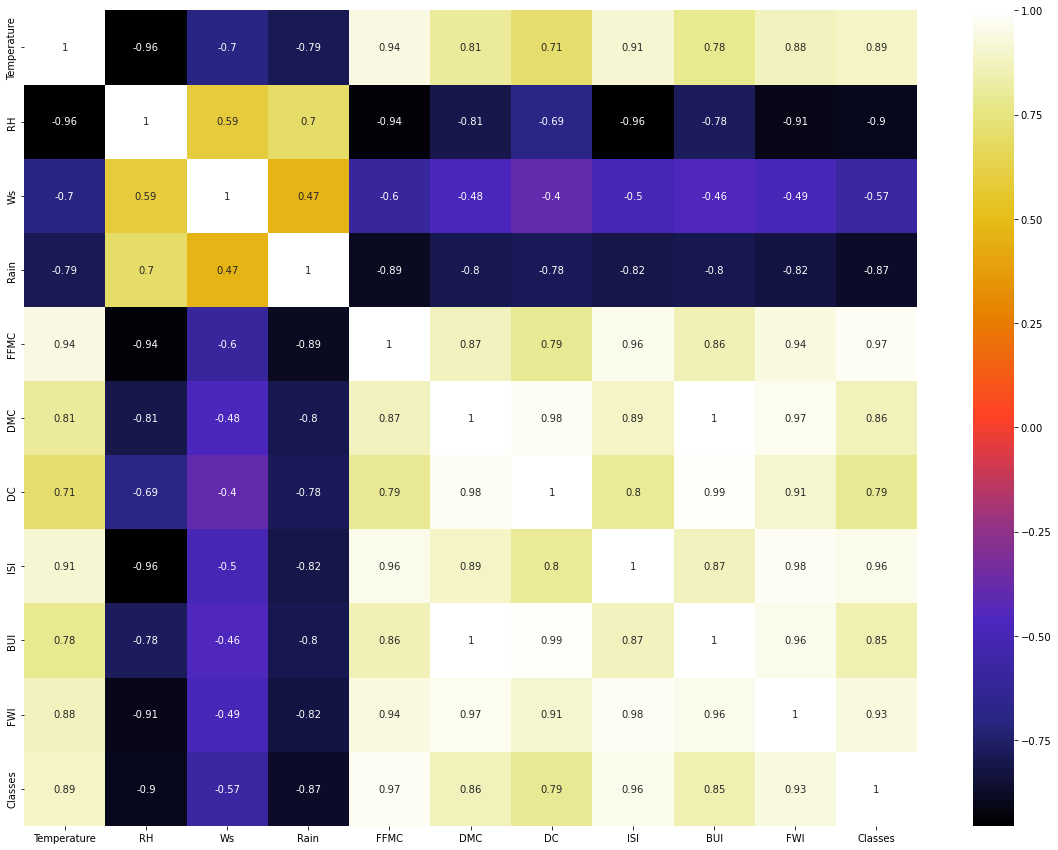

In [51]:
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(),cmap='CMRmap',annot=True)

# Visualisation Of Target Feature

In [52]:
df.Classes.value_counts()

1.0    138
0.0    106
Name: Classes, dtype: int64

<AxesSubplot:xlabel='region', ylabel='Classes'>

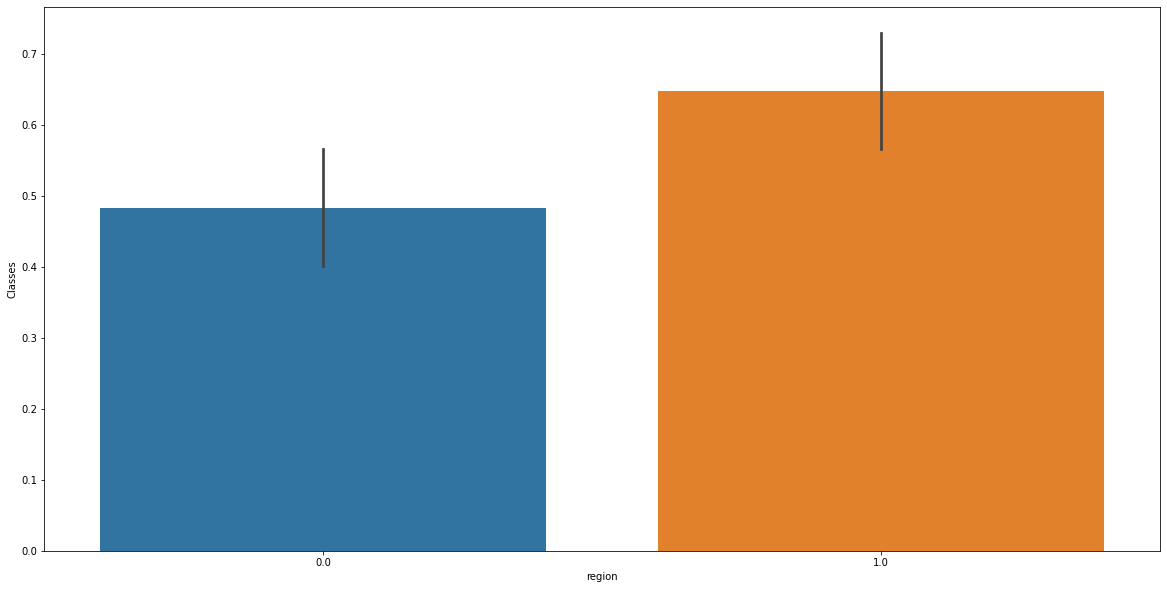

In [53]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)
sns.barplot(x='region',y='Classes',data=df)

In [54]:
data = df.groupby('region').sum()
df_2.reset_index(inplace=True)
sns.barplot(x='region',y='Classes',data=df_2)

NameError: name 'df_2' is not defined

# Visualisation of Temperature Feature

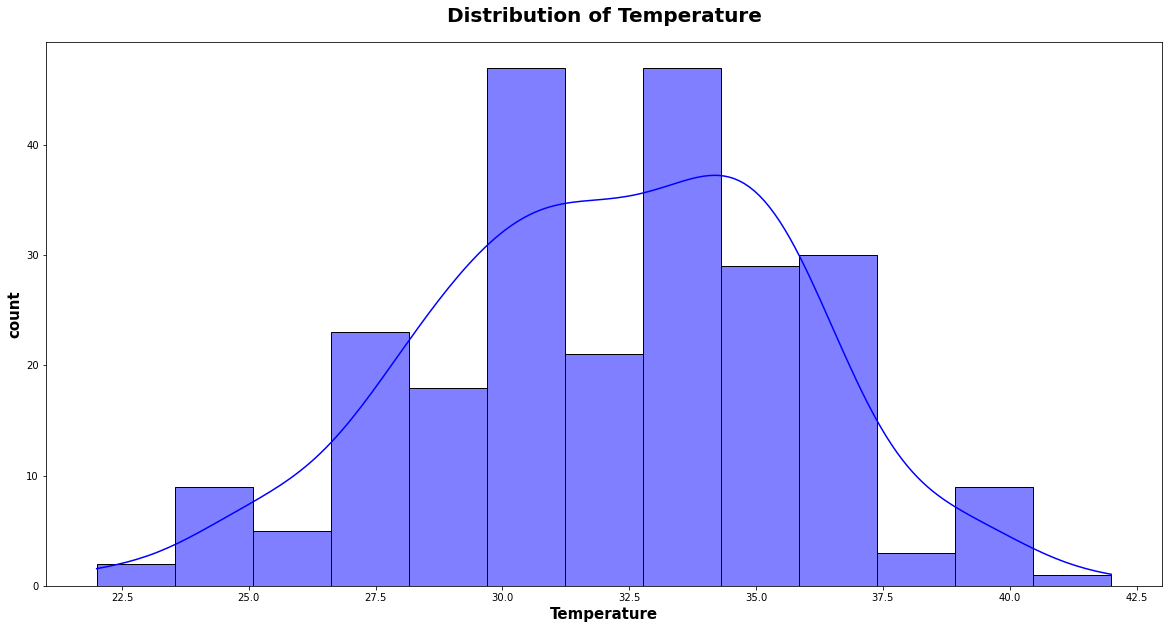

In [55]:
plt.subplots(figsize=(20,10))
sns.histplot("Distribution of Temperature",x=df.Temperature,color='b',kde=True)
plt.title("Distribution of Temperature",weight='bold',fontsize=20,pad=20)
plt.xlabel("Temperature",weight='bold',fontsize=15)
plt.ylabel("count",weight='bold',fontsize=15)
plt.show()

<AxesSubplot:xlabel='day', ylabel='Temperature'>

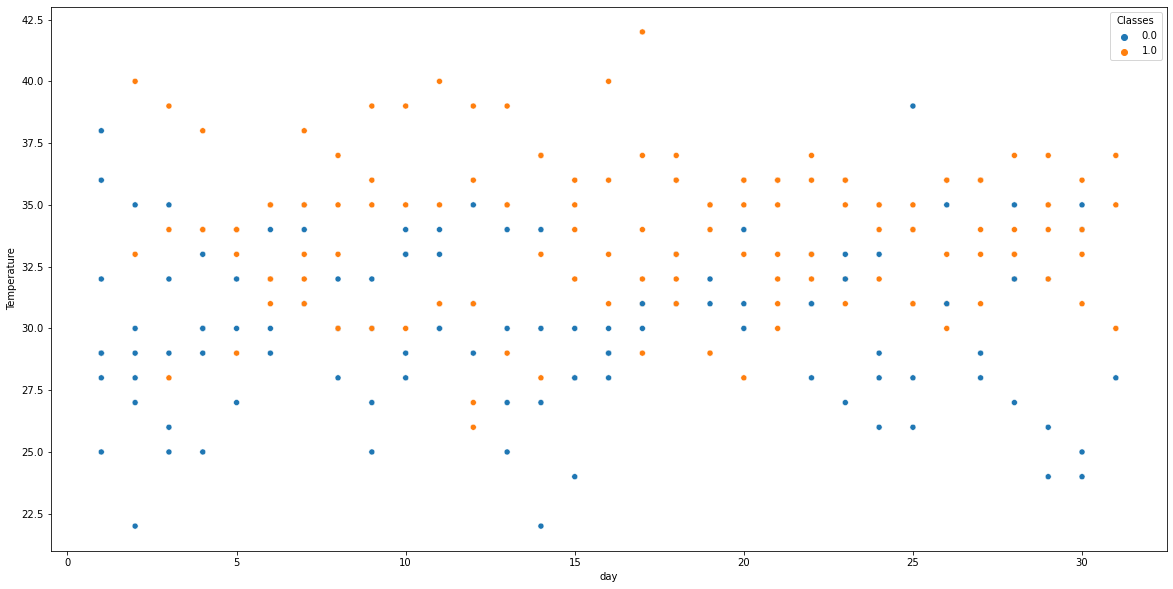

In [56]:
sns.scatterplot(data=df,x='day',y='Temperature',hue='Classes')

Observation:

Most cases of fire occur at Temperature above 30 degree celcius

<AxesSubplot:xlabel='month', ylabel='Temperature'>

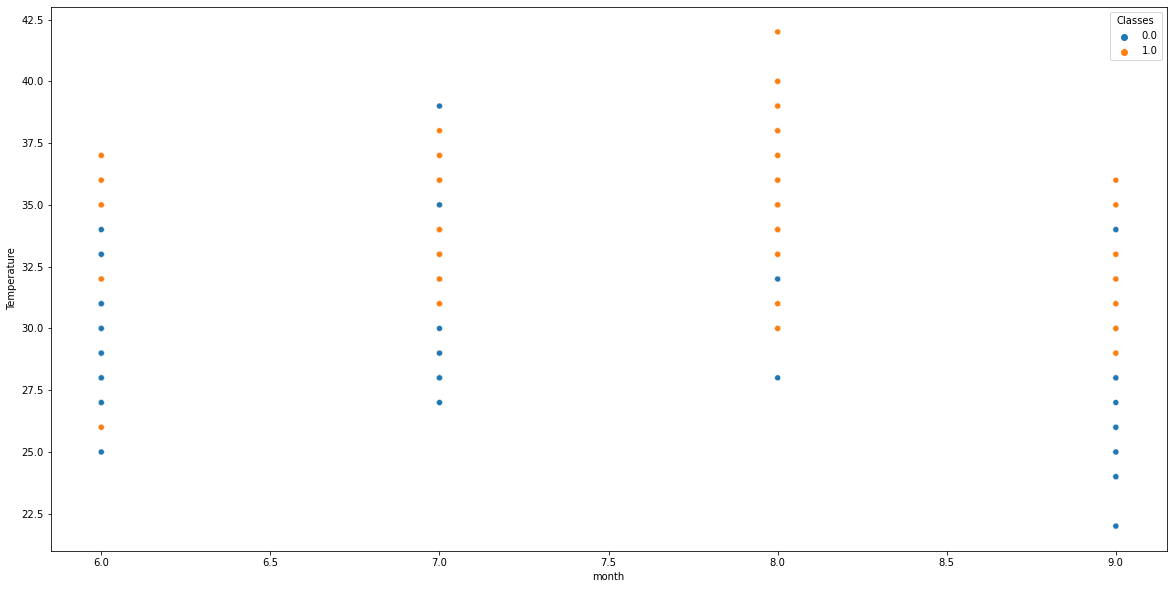

In [57]:
sns.scatterplot(data=df,x='month',y='Temperature',hue='Classes')

Observation:

1.July & August have more no. of fire

<AxesSubplot:xlabel='region', ylabel='Temperature'>

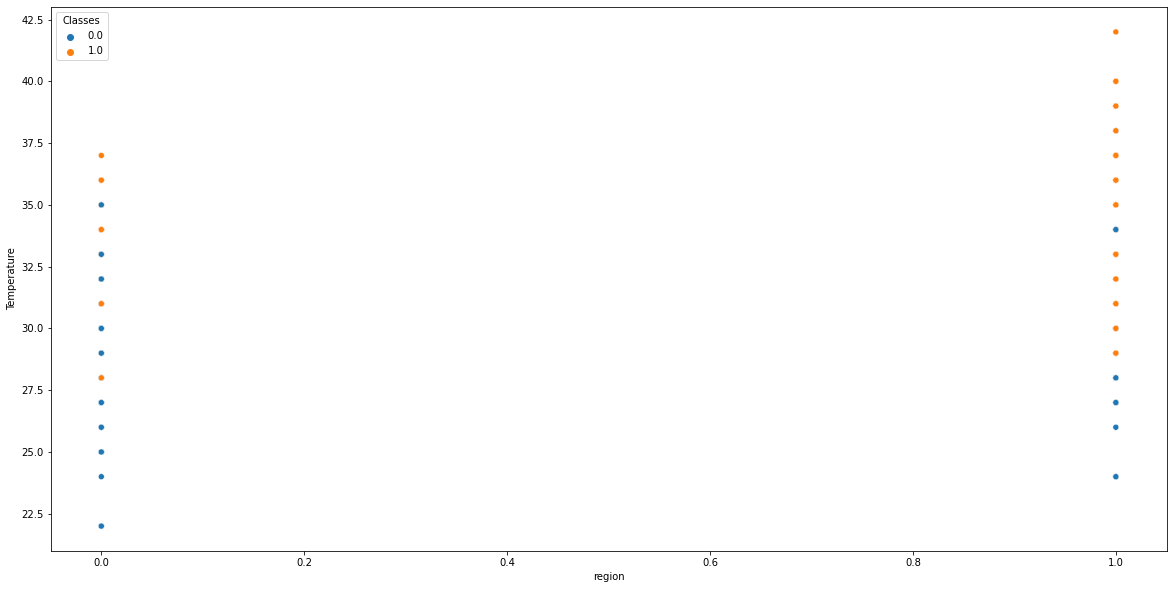

In [58]:
sns.scatterplot(data=df,x='region',y='Temperature',hue='Classes')

Obeservation:

1.Sidi-Al-beas region has more no. of fire occurence than bejia region

<AxesSubplot:xlabel='Temperature', ylabel='Classes'>

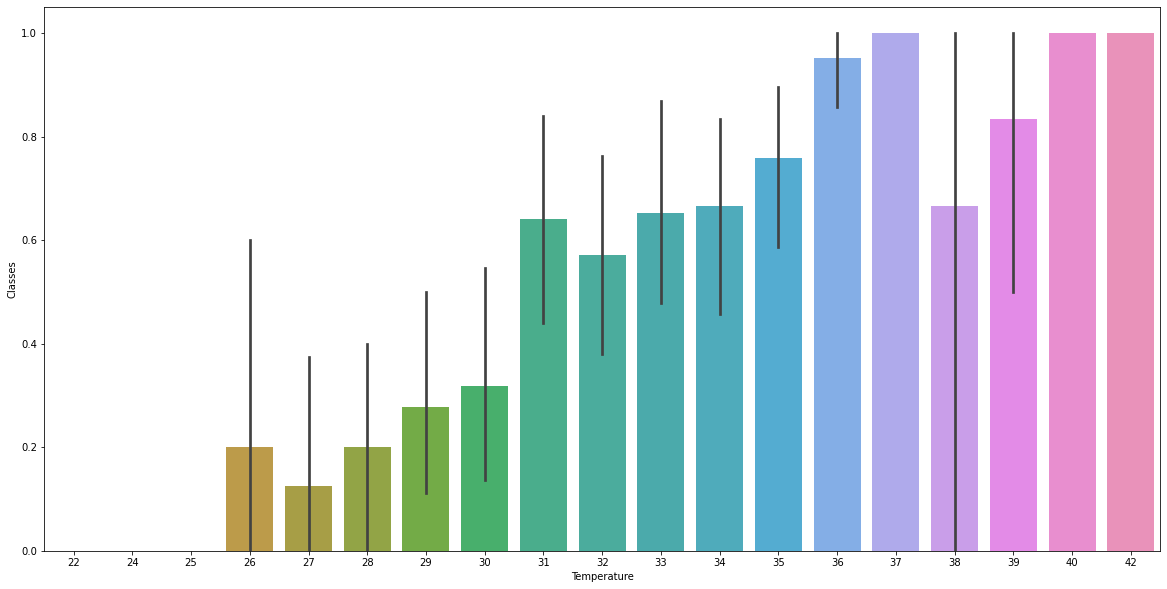

In [59]:
matplotlib.rcParams['figure.figsize']=(20,10)
sns.barplot(x='Temperature',y='Classes',data=df)

Observation:
    
    1.Fire occurs at temperature 37,40,42

<AxesSubplot:xlabel='region', ylabel='Rain'>

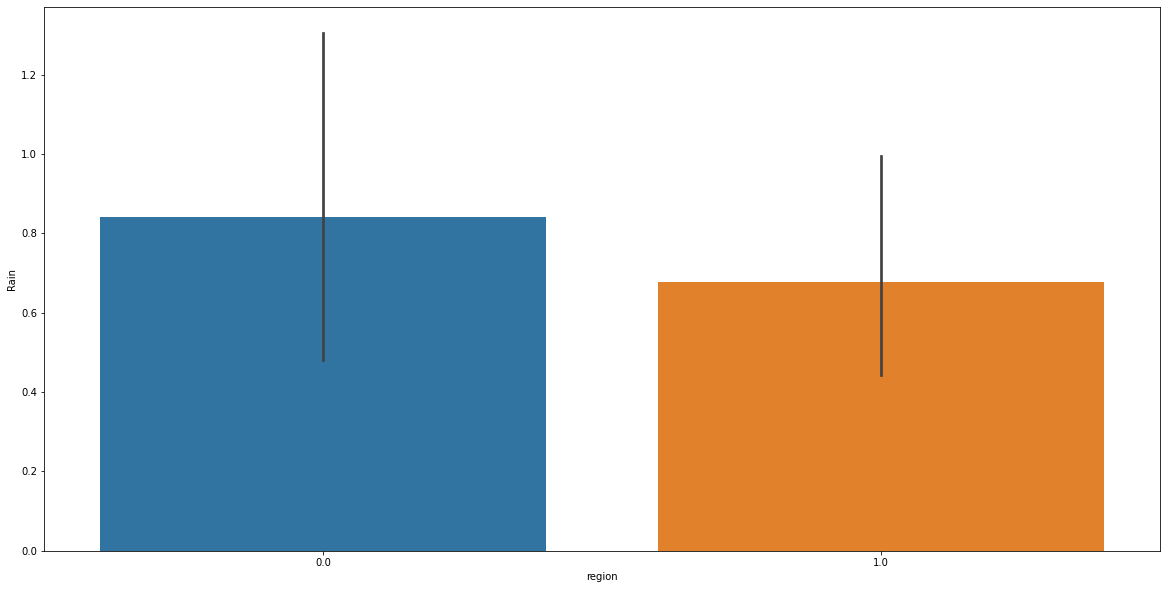

In [60]:
matplotlib.rcParams['figure.figsize']=(20,10)
sns.barplot(data=df,x='region',y='Rain')

# Dropping The Outliers:

In [61]:
def outliers_imputation_mild(df,column):
    IQR = df[column].quantile(0.75)-df[column].quantile(0.25)
    lower_fence=df[column].quantile(0.25)-(IQR*1.5)
    upper_fence=df[column].quantile(0.75)+(IQR*1.5)
    print("IQR:",IQR)
    print(f"Lower Fence {column}:",lower_fence)
    print(f"Upper Fence {column}:",upper_fence)
    print("_______________________________________")
    df.loc[df[column]<=lower_fence,column]=lower_fence
    df.loc[df[column]>=upper_fence,column]=upper_fence

In [62]:
columns=df.columns

In [63]:
for col in columns:
    outliers_imputation_mild(df,col)

IQR: 15.0
Lower Fence day: -14.5
Upper Fence day: 45.5
_______________________________________
IQR: 1.0
Lower Fence month: 5.5
Upper Fence month: 9.5
_______________________________________
IQR: 0.0
Lower Fence year: 2012.0
Upper Fence year: 2012.0
_______________________________________
IQR: 5.0
Lower Fence Temperature: 22.5
Upper Fence Temperature: 42.5
_______________________________________
IQR: 21.25
Lower Fence RH: 20.125
Upper Fence RH: 105.125
_______________________________________
IQR: 3.0
Lower Fence Ws: 9.5
Upper Fence Ws: 21.5
_______________________________________
IQR: 0.5
Lower Fence Rain: -0.75
Upper Fence Rain: 1.25
_______________________________________
IQR: 16.224999999999994
Lower Fence FFMC: 47.73750000000001
Upper Fence FFMC: 112.63749999999999
_______________________________________
IQR: 14.95
Lower Fence DMC: -16.624999999999996
Upper Fence DMC: 43.175
_______________________________________
IQR: 54.87500000000001
Lower Fence DC: -69.03750000000002
Upper Fence

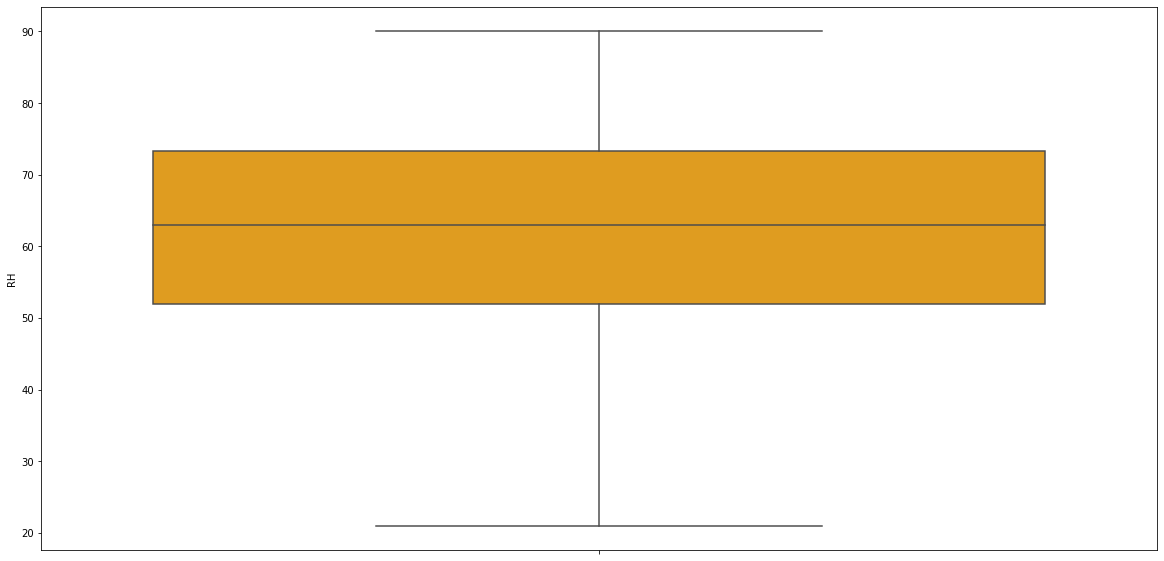

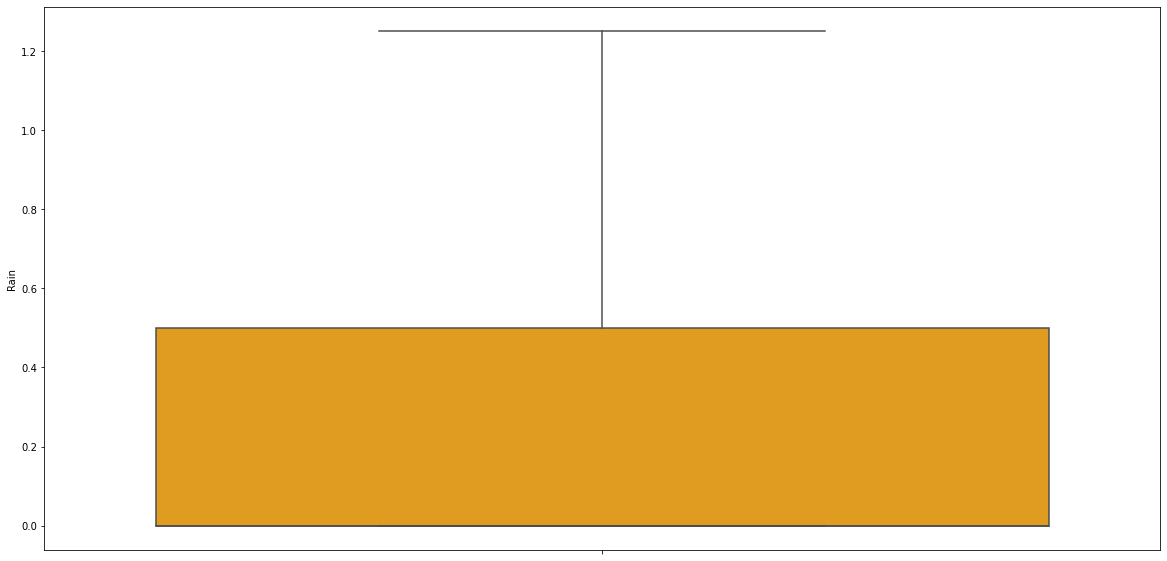

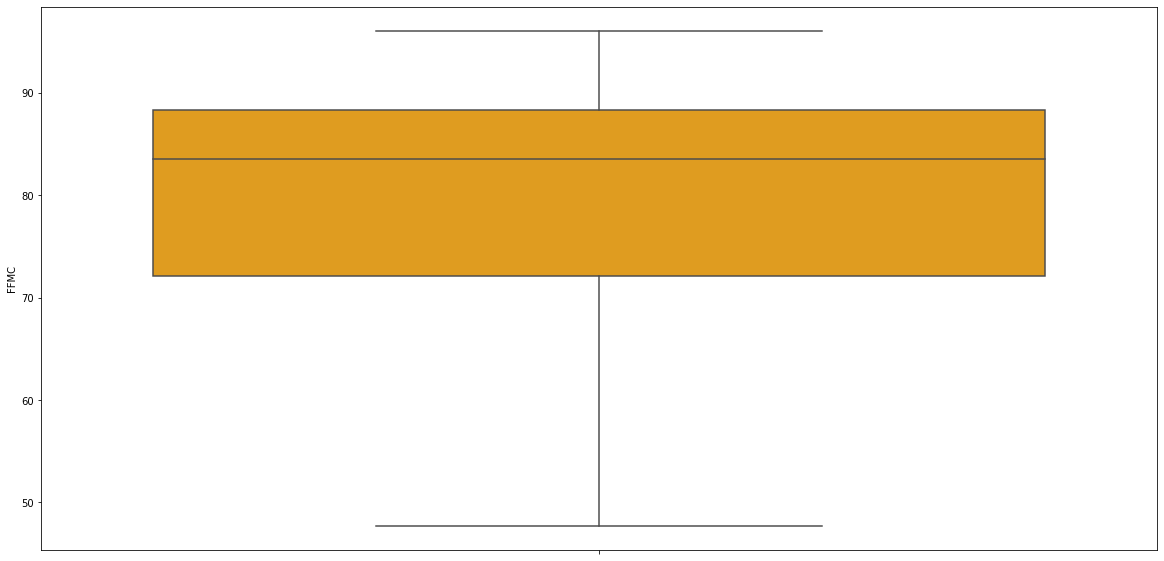

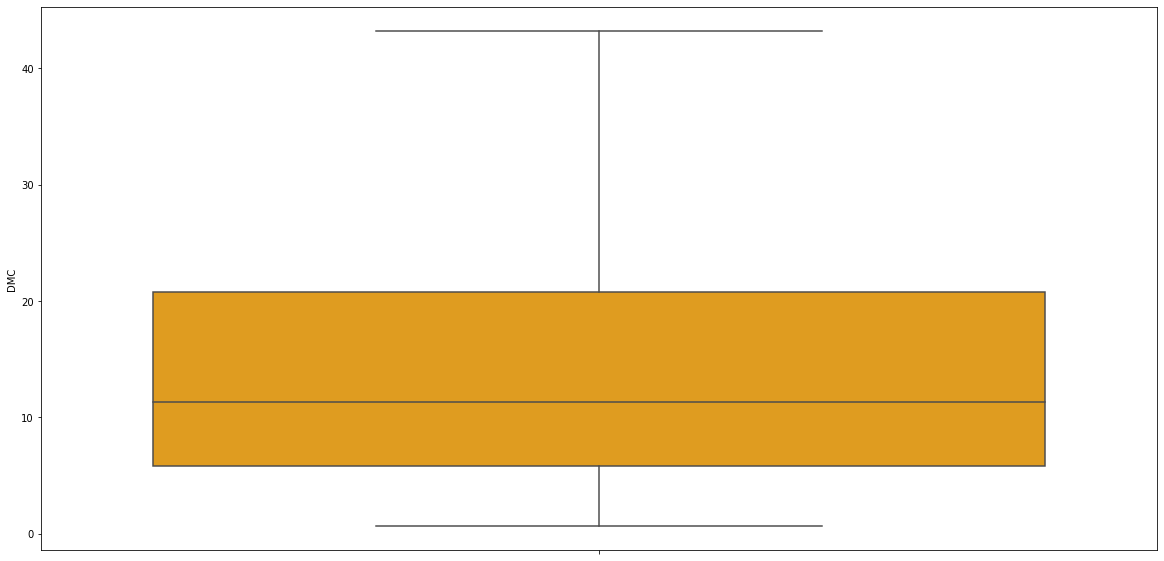

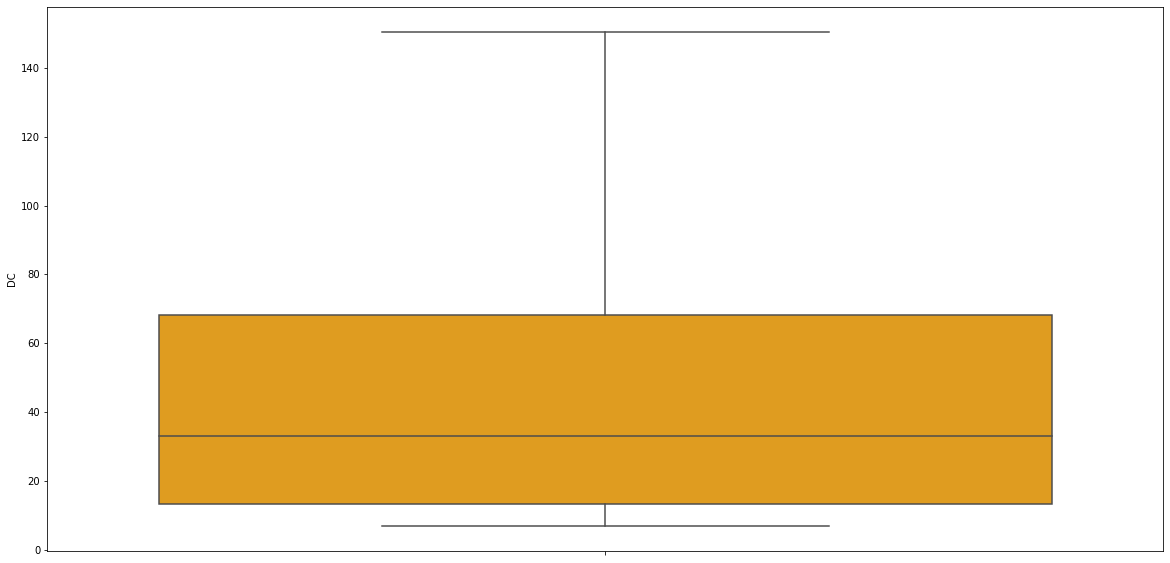

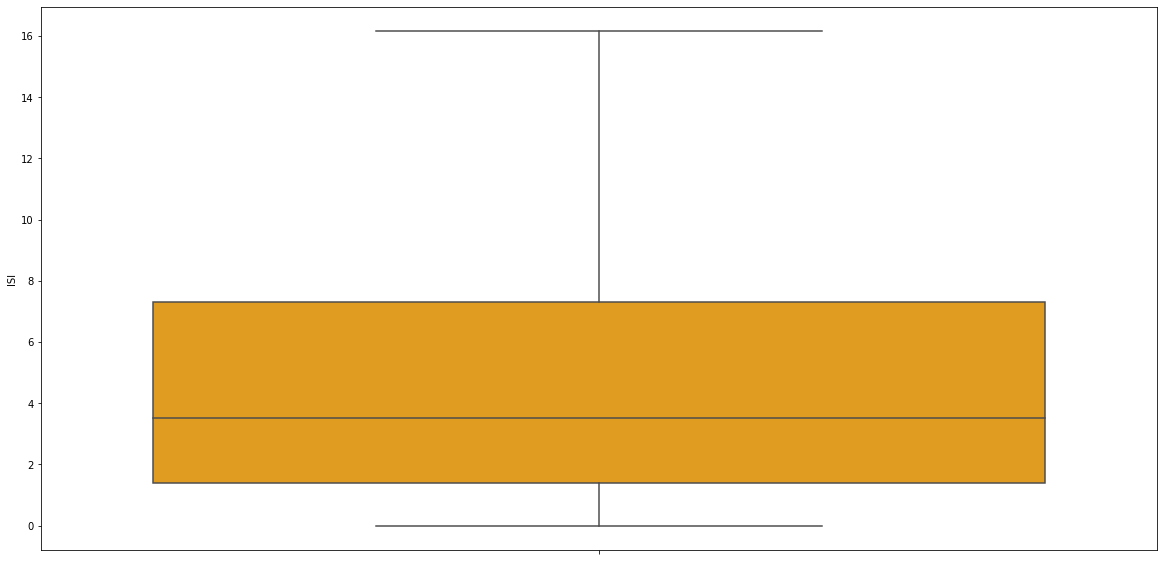

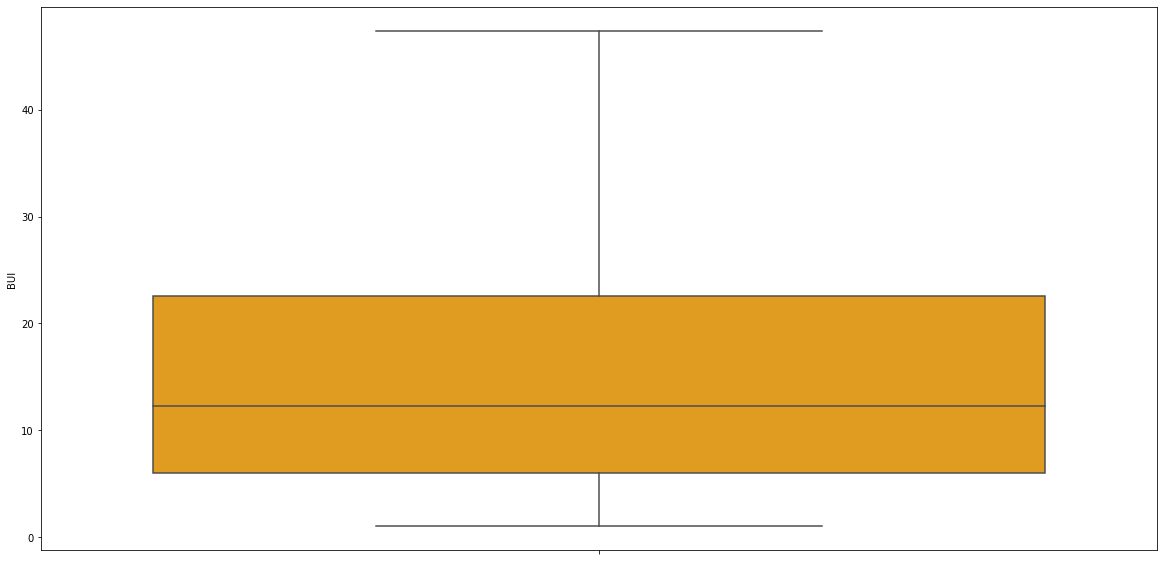

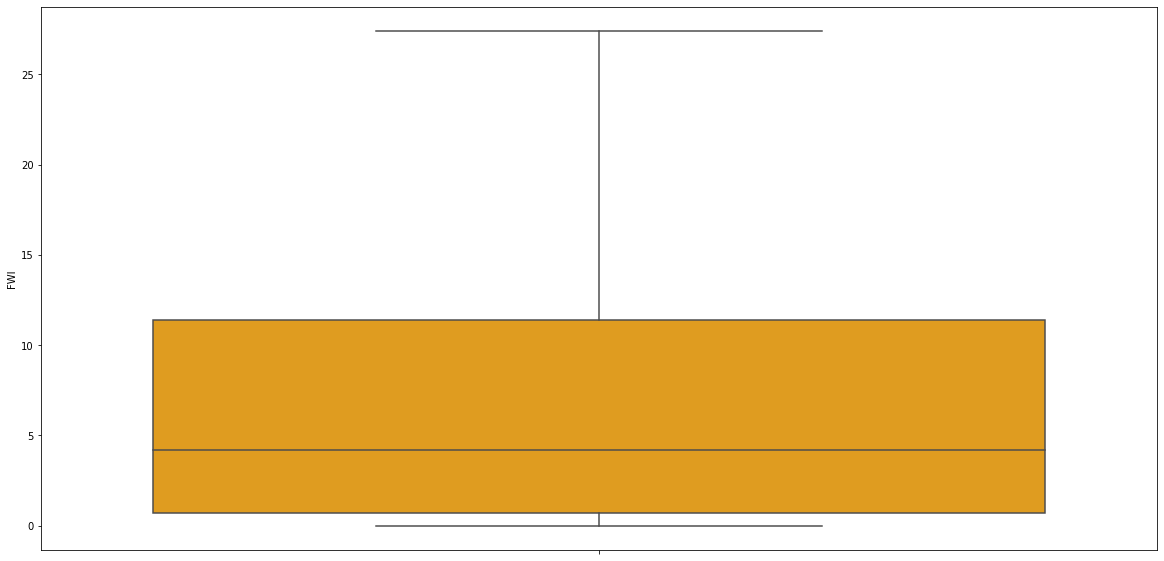

In [64]:
for fea in cont_fea:
    plt.figure(figsize=(20,10))
    sns.boxplot(data=df,y=fea,color='orange')
    plt.show()

# Creating Dependent & Independent Features

In [65]:
x=df.drop(['year','Classes'],axis=1)
y=df['Classes']

In [66]:
x

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region
0,1.0,6.0,29.0,57.0,18.0,0.00,65.7000,3.4,7.6,1.3,3.4,0.5,0.0
1,2.0,6.0,29.0,61.0,13.0,1.25,64.4000,4.1,7.6,1.0,3.9,0.4,0.0
2,3.0,6.0,26.0,82.0,21.5,1.25,47.7375,2.5,7.1,0.3,2.7,0.1,0.0
3,4.0,6.0,25.0,89.0,13.0,1.25,47.7375,1.3,6.9,0.0,1.7,0.0,0.0
4,5.0,6.0,27.0,77.0,16.0,0.00,64.8000,3.0,14.2,1.2,3.9,0.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26.0,9.0,30.0,65.0,14.0,0.00,85.4000,16.0,44.5,4.5,16.9,6.5,1.0
240,27.0,9.0,28.0,87.0,15.0,1.25,47.7375,6.5,8.0,0.1,6.2,0.0,1.0
241,28.0,9.0,27.0,87.0,21.5,0.50,47.7375,3.5,7.9,0.4,3.4,0.2,1.0
242,29.0,9.0,24.0,54.0,18.0,0.10,79.7000,4.3,15.2,1.7,5.1,0.7,1.0


# Dependent Feature

In [67]:
y

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
239    1.0
240    0.0
241    0.0
242    0.0
243    0.0
Name: Classes, Length: 244, dtype: float64

# Visualising the relationship between our independent & dependent feature

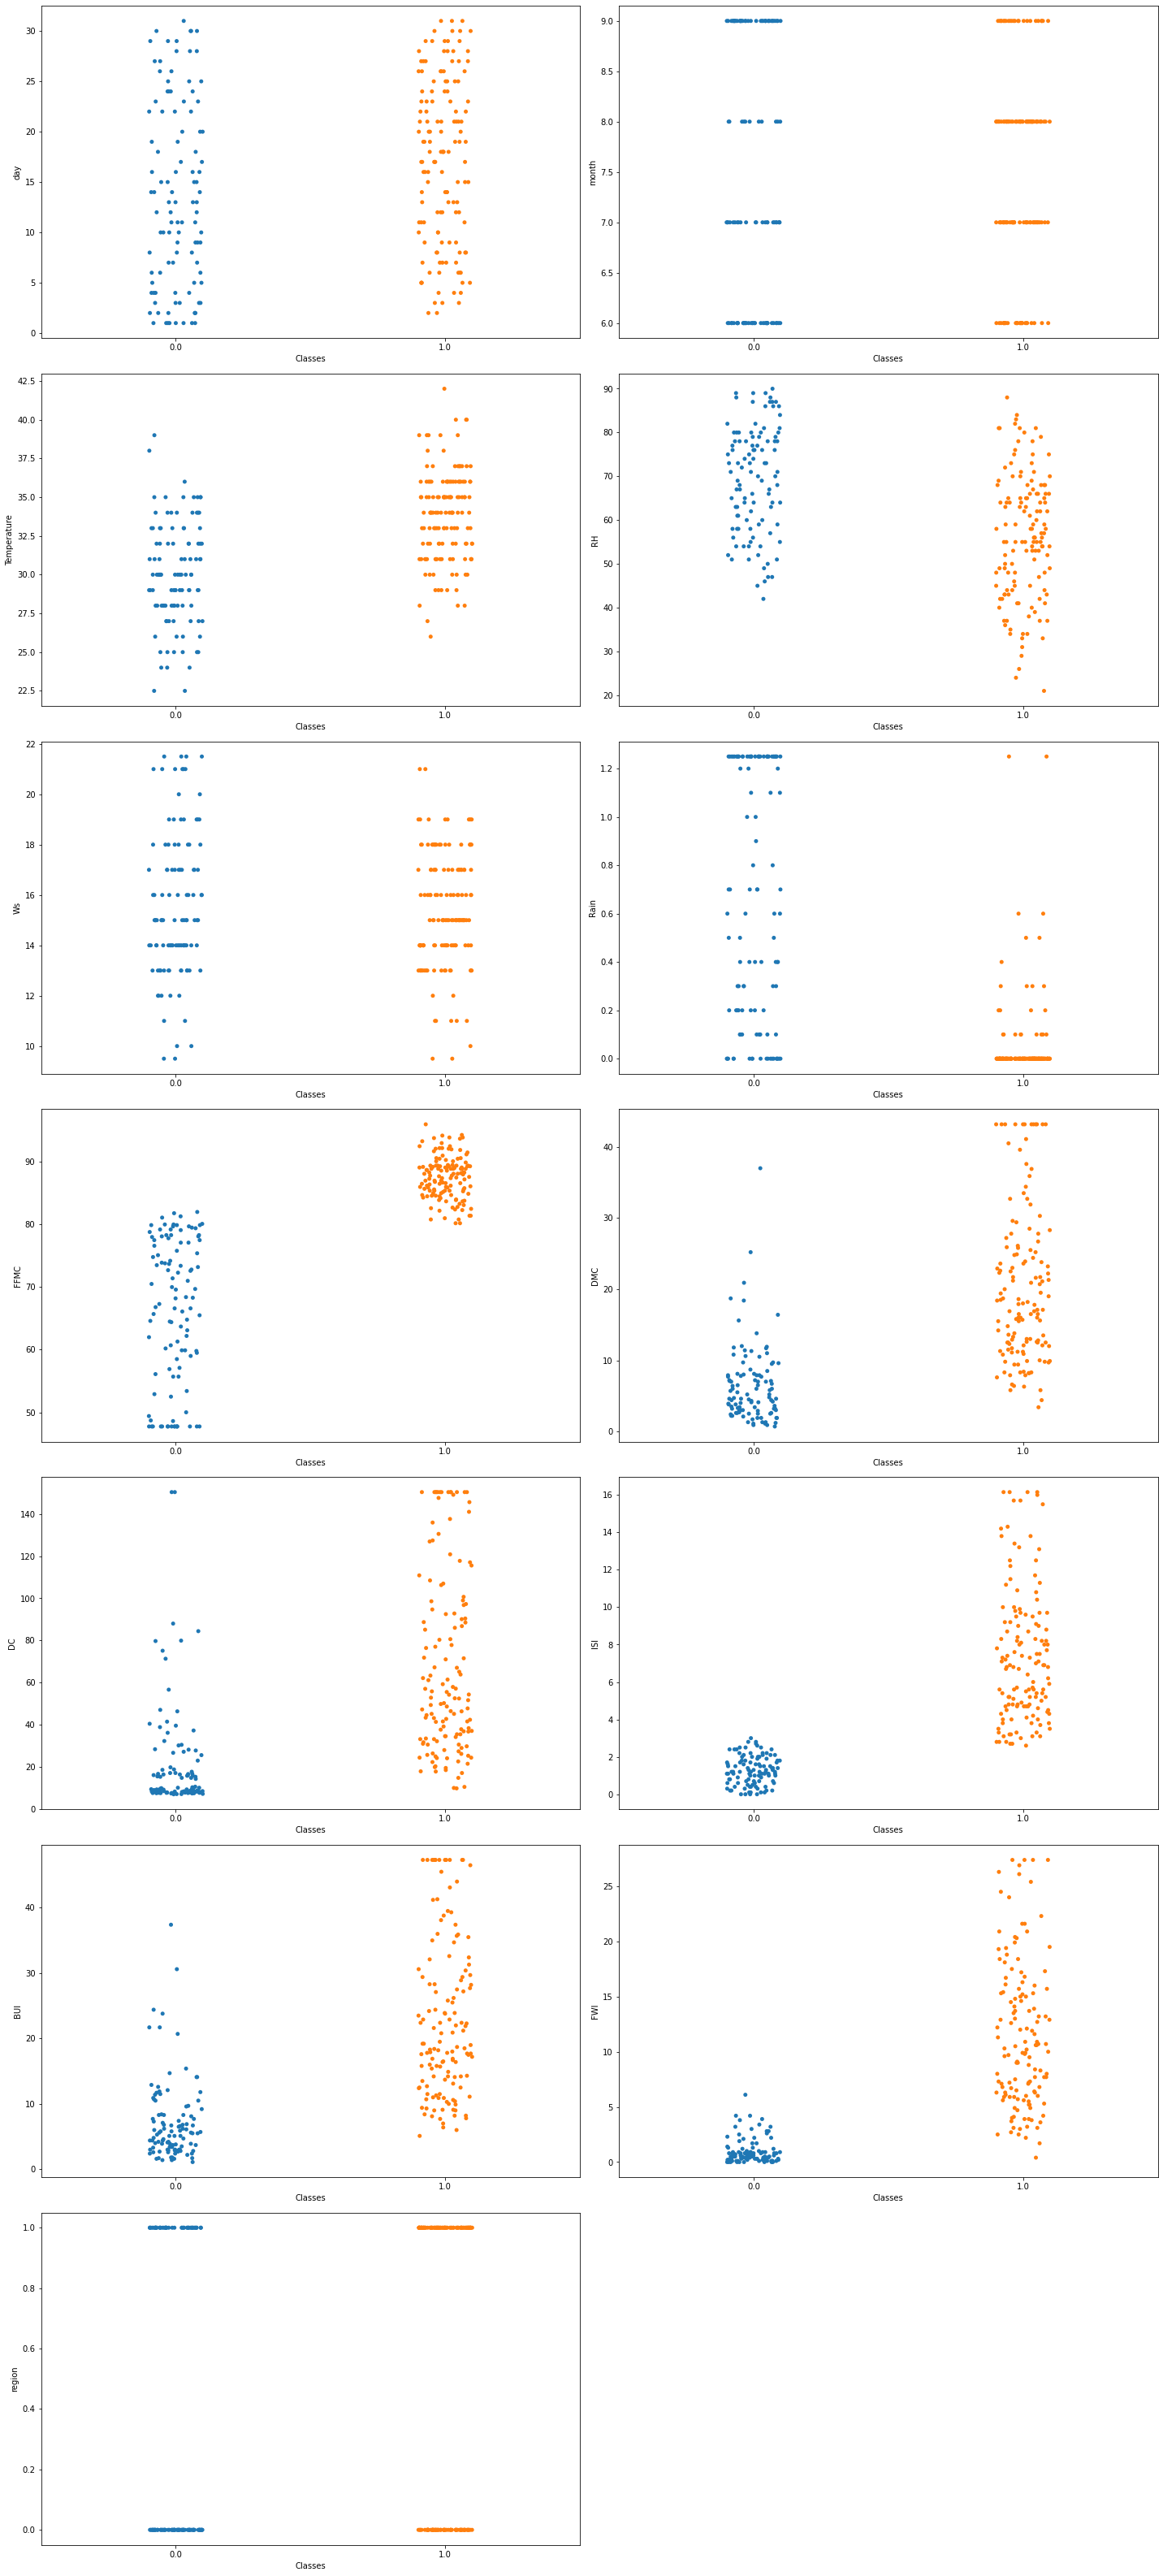

In [68]:
plt.figure(figsize=(20,50),facecolor='white')
plotnumber = 1

for column in x:
    if plotnumber<=15:
        ax= plt.subplot(8,2,plotnumber)
        sns.stripplot(y,x[column])
    plotnumber+=1
plt.tight_layout()

# Observation:

1.It is visible that for temperature between 30 to 37, there is most no of cases of occurance of fire, i.e Hot regions are more prone to forrest fires.

2.For RH 40 to 70 and wind speed between 13 to 19 Km/h, Most no of cases of occurance of fire is reported, i.e dry regions are more prone to forrest fires.

3.Almost all cases of occurance of fire is for region having rain less than 1 mm, i.e dry regions are more prone to forrest fires.

4.For FFMC(Fine Fuel Moisture Code ) greater than 80, almost all cases of fire is reported.

5.DMC (Duff Moisture Code) >30 and DC (Drought code) >100, almost all cases of occurance of fire reported, this means drought affected areas are more prone to forrest fires.

# Importing sklearn libraries for Machine Learnig

In [69]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score

# Train Test Split

In [70]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [71]:
x_train.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region
115,24.0,9.0,29.0,65.0,19.0,0.60,68.3000,5.5,15.2,1.5,5.8,0.7,0.0
181,30.0,7.0,36.0,56.0,16.0,0.00,88.9000,23.8,57.1,8.2,23.8,13.2,1.0
225,12.0,9.0,31.0,72.0,14.0,0.00,84.2000,8.3,25.2,3.8,9.1,3.9,1.0
68,8.0,8.0,32.0,60.0,18.0,0.30,77.1000,11.3,47.0,2.2,14.1,2.6,0.0
104,13.0,9.0,25.0,86.0,21.0,1.25,47.7375,1.3,7.5,0.1,1.8,0.0,0.0


In [72]:
y_train.head()

115    0.0
181    1.0
225    1.0
68     0.0
104    0.0
Name: Classes, dtype: float64

In [73]:
x_test.head()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region
24,25.0,6.0,31.0,64.0,15.0,0.0,86.7,14.2,63.8,5.7,18.3,8.4,0.0
6,7.0,6.0,33.0,54.0,13.0,0.0,88.2,9.9,30.5,6.4,10.9,7.2,0.0
153,2.0,7.0,33.0,48.0,16.0,0.0,87.6,7.9,17.8,6.8,7.8,6.4,1.0
211,29.0,8.0,35.0,53.0,17.0,0.5,80.2,20.7,149.2,2.7,30.6,5.9,1.0
198,16.0,8.0,40.0,41.0,10.0,0.1,92.0,22.6,65.1,9.5,24.2,14.8,1.0


In [74]:
y_test.head()

24     1.0
6      1.0
153    1.0
211    1.0
198    1.0
Name: Classes, dtype: float64

In [75]:
x_train.shape,y_train.shape

((183, 13), (183,))

In [76]:
x_test.shape,y_test.shape

((61, 13), (61,))

# Standardization or Feature Scaling

In [77]:
scaler = StandardScaler()
scaler

StandardScaler()

In [78]:
x_train= scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [79]:
x_train

array([[ 0.93609743,  1.35196693, -0.81544626, ..., -0.80806107,
        -0.85092915, -1.00547949],
       [ 1.61141607, -0.44085878,  1.06669187, ...,  0.59691945,
         0.87396544,  0.99455037],
       [-0.41453986,  1.35196693, -0.27769251, ..., -0.55048131,
        -0.40935613,  0.99455037],
       ...,
       [-1.65262404,  1.35196693, -1.89095377, ..., -1.12027896,
        -0.93372409, -1.00547949],
       [ 1.38630986, -0.44085878,  0.26006124, ..., -0.03532178,
         0.29440086,  0.99455037],
       [-0.52709297,  1.35196693, -0.54656939, ..., -1.07344628,
        -0.90612577, -1.00547949]])

In [80]:
x_test

array([[ 1.04865054e+00, -1.33727163e+00, -2.77692512e-01,
         9.51187672e-02, -2.45352719e-01, -6.73347155e-01,
         6.57810877e-01, -8.59210833e-03,  3.72495997e-01,
         2.47607934e-01,  1.67619849e-01,  2.11605921e-01,
        -1.00547949e+00],
       [-9.77305397e-01, -1.33727163e+00,  2.60061241e-01,
        -5.84831795e-01, -1.06170813e+00, -6.73347155e-01,
         7.69767405e-01, -3.89500843e-01, -3.93856505e-01,
         4.19106049e-01, -4.09983255e-01,  4.60160403e-02,
        -1.00547949e+00],
       [-1.54007093e+00, -4.40858780e-01,  2.60061241e-01,
        -9.92802132e-01,  1.62824986e-01, -6.73347155e-01,
         7.24984794e-01, -5.66667697e-01, -6.86129081e-01,
         5.17104972e-01, -6.51952123e-01, -6.43772133e-02,
         9.94550368e-01],
       [ 1.49886297e+00,  4.55554073e-01,  7.97814994e-01,
        -6.52826851e-01,  5.71002692e-01,  3.95365155e-01,
         1.72665924e-01,  5.67200165e-01,  2.33785647e+00,
        -4.87383987e-01,  1.12768987e

# 6.0  Model

# 1.0 Logistic Regression

In [81]:
logistic_reg = LogisticRegression()
logistic_reg

LogisticRegression()

In [82]:
logistic_reg.fit(x_train,y_train)

LogisticRegression()

In [83]:
logistic_reg_pred = logistic_reg.predict(x_test)
logistic_reg_pred

array([1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1.,
       0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 0., 0., 1., 1.])

In [84]:
from sklearn.metrics import accuracy_score,classification_report
score = accuracy_score(logistic_reg_pred,y_test)
print(score)

0.9672131147540983


# 1.2 Performance Metrics

# 1.2.1 Confusion Matrix

In [85]:
confusion_mat = confusion_matrix(y_test,logistic_reg_pred)
confusion_mat

array([[24,  0],
       [ 2, 35]], dtype=int64)

In [86]:
truly_positive = confusion_mat[0][0]
falsely_positive = confusion_mat[0][1]
falsely_negative= confusion_mat[1][0]
truly_negative= confusion_mat[1][1]

# 1.2.2 Accuracy Score

In [87]:
accuracy = round(accuracy_score(y_test,logistic_reg_pred),4)
accuracy

0.9672

In [88]:
#manual calcutation of accuracy
accuracy_manual = round(((truly_positive+truly_negative)/(truly_positive+falsely_positive+falsely_negative+truly_negative)),4)
print("Accuracy of our model is {}".format(accuracy_manual))

Accuracy of our model is 0.9672


# 1.2.3 Precision

In [89]:
precision_manual = (truly_positive/(truly_positive+falsely_positive))
print("Precision of our model is {}".format(precision_manual))

Precision of our model is 1.0


# 1.2.4 Recall

In [90]:
recall_manual = round(truly_positive/(truly_positive + falsely_negative),4)
recall_manual

0.9231

# 1.2.5 F-1 Score

In [91]:
f1_score = 2*(precision_manual*recall_manual)/(precision_manual+recall_manual)

In [92]:
f1_score

0.9600124798502419

# 1.2.6 Classification Report

In [93]:
print(classification_report(y_test,logistic_reg_pred))

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96        24
         1.0       1.00      0.95      0.97        37

    accuracy                           0.97        61
   macro avg       0.96      0.97      0.97        61
weighted avg       0.97      0.97      0.97        61



# 7.0 Saving the Modal

In [94]:
import pickle
with open("model_logistic_regression_algerion_ff.sav","wb") as f:
    pickle.dump(logistic_reg,f)

# 8.0 Creating Imbalance Dataset

In [95]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1.0,6.0,2012,29.0,57.0,18.0,0.00,65.7000,3.4,7.6,1.3,3.4,0.5,0.0,0.0
1,2.0,6.0,2012,29.0,61.0,13.0,1.25,64.4000,4.1,7.6,1.0,3.9,0.4,0.0,0.0
2,3.0,6.0,2012,26.0,82.0,21.5,1.25,47.7375,2.5,7.1,0.3,2.7,0.1,0.0,0.0
3,4.0,6.0,2012,25.0,89.0,13.0,1.25,47.7375,1.3,6.9,0.0,1.7,0.0,0.0,0.0
4,5.0,6.0,2012,27.0,77.0,16.0,0.00,64.8000,3.0,14.2,1.2,3.9,0.5,0.0,0.0


In [96]:
df.shape

(244, 15)

In [97]:
### Creating imbalance
### 1. splitting data in 90:10 percent ratio using train test split
x1 = pd.DataFrame(df,columns = ['day','month','year','Temperature','RH','Ws','Rain','FFMC','DMC','DC','ISI','BUI','FWI','region'])
y1 = pd.DataFrame(df,columns = ['Classes'])

In [98]:
x_train_imb,x_test_imb,y_train_imb,y_test_imb = train_test_split(x1,y1,test_size=0.10,random_state=17)

In [99]:
x_train_imb.shape,y_train_imb.shape

((219, 14), (219, 1))

In [100]:
x_test_imb.shape,y_test_imb.shape

((25, 14), (25, 1))

In [101]:
### Replacing all values as 1 in y_train and all values as zero in y_test to create imbalance 
y_train_imb = y_train_imb.replace(0,1)

In [102]:
y_train_imb.head()

,Classes
156,1.0
183,1.0
11,1.0
75,1.0
130,1.0


In [103]:
y_test_imb = y_test_imb.replace(1,0)

In [104]:
y_test_imb.head()

,Classes
48,0.0
216,0.0
101,0.0
38,0.0
86,0.0


In [105]:
x_train_imb.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region
156,5.0,7.0,2012,34.0,45.0,18.0,0.0,90.5,18.7,46.4,11.3,18.7,15.0,1.0
183,1.0,8.0,2012,38.0,52.0,14.0,0.0,78.3,4.4,10.5,2.0,4.4,0.8,1.0
11,12.0,6.0,2012,26.0,81.0,19.0,0.0,84.0,13.8,61.4,4.8,17.7,7.1,0.0
75,15.0,8.0,2012,36.0,55.0,13.0,0.3,82.4,15.6,92.5,3.7,22.0,6.3,0.0
130,9.0,6.0,2012,27.0,59.0,18.0,0.1,78.1,8.5,14.7,2.4,8.3,1.9,1.0


In [106]:
#combining x_train_imb & y_train_imb
train_imb = x_train_imb.join(pd.DataFrame(y_train_imb))
train_imb.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region,Classes
156,5.0,7.0,2012,34.0,45.0,18.0,0.0,90.5,18.7,46.4,11.3,18.7,15.0,1.0,1.0
183,1.0,8.0,2012,38.0,52.0,14.0,0.0,78.3,4.4,10.5,2.0,4.4,0.8,1.0,1.0
11,12.0,6.0,2012,26.0,81.0,19.0,0.0,84.0,13.8,61.4,4.8,17.7,7.1,0.0,1.0
75,15.0,8.0,2012,36.0,55.0,13.0,0.3,82.4,15.6,92.5,3.7,22.0,6.3,0.0,1.0
130,9.0,6.0,2012,27.0,59.0,18.0,0.1,78.1,8.5,14.7,2.4,8.3,1.9,1.0,1.0


In [107]:
test_imb = x_test_imb.join(pd.DataFrame(y_test_imb))
test_imb.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region,Classes
48,19.0,7.0,2012,35.0,59.0,17.0,0.00,88.1,12.000,52.8000,7.7,18.2000,10.9,0.0,0.0
216,3.0,9.0,2012,28.0,75.0,16.0,0.00,82.2,4.400,24.3000,3.3,6.0000,2.5,1.0,0.0
101,10.0,9.0,2012,33.0,73.0,12.0,1.25,59.9,2.200,8.9000,0.7,2.7000,0.3,0.0,0.0
38,9.0,7.0,2012,32.0,68.0,14.0,1.25,66.6,7.700,9.2000,1.1,7.4000,0.6,0.0,0.0
86,26.0,8.0,2012,31.0,78.0,18.0,0.00,85.8,43.175,150.4625,4.7,47.3125,13.7,0.0,0.0


In [108]:
train_imb.shape,test_imb.shape

((219, 15), (25, 15))

In [109]:
#combining train_imb & test_imb in df_imb
df_imb = pd.concat([train_imb,test_imb],ignore_index=True,sort=False)

In [110]:
df_imb.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region,Classes
0,5.0,7.0,2012,34.0,45.0,18.0,0.0,90.5,18.7,46.4,11.3,18.7,15.0,1.0,1.0
1,1.0,8.0,2012,38.0,52.0,14.0,0.0,78.3,4.4,10.5,2.0,4.4,0.8,1.0,1.0
2,12.0,6.0,2012,26.0,81.0,19.0,0.0,84.0,13.8,61.4,4.8,17.7,7.1,0.0,1.0
3,15.0,8.0,2012,36.0,55.0,13.0,0.3,82.4,15.6,92.5,3.7,22.0,6.3,0.0,1.0
4,9.0,6.0,2012,27.0,59.0,18.0,0.1,78.1,8.5,14.7,2.4,8.3,1.9,1.0,1.0


In [111]:
df_imb.shape

(244, 15)

In [112]:
#there is imbalance in our dataset
df_imb.Classes.value_counts()

1.0    219
0.0     25
Name: Classes, dtype: int64

<AxesSubplot:xlabel='Classes', ylabel='count'>

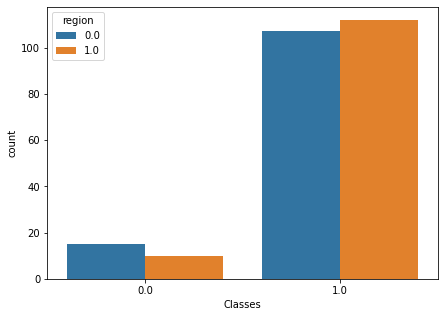

In [113]:
plt.figure(figsize=(7,5))
sns.countplot(data=df_imb,x='Classes',hue='region')

# Logistic Regression Model on Imbalanced Dataset

In [114]:
df_imb.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region,Classes
0,5.0,7.0,2012,34.0,45.0,18.0,0.0,90.5,18.7,46.4,11.3,18.7,15.0,1.0,1.0
1,1.0,8.0,2012,38.0,52.0,14.0,0.0,78.3,4.4,10.5,2.0,4.4,0.8,1.0,1.0
2,12.0,6.0,2012,26.0,81.0,19.0,0.0,84.0,13.8,61.4,4.8,17.7,7.1,0.0,1.0
3,15.0,8.0,2012,36.0,55.0,13.0,0.3,82.4,15.6,92.5,3.7,22.0,6.3,0.0,1.0
4,9.0,6.0,2012,27.0,59.0,18.0,0.1,78.1,8.5,14.7,2.4,8.3,1.9,1.0,1.0


# Separating Independent & Dependent Feature

In [137]:
x1 = df_imb.drop(columns = ['Classes'])
y1 = df_imb['Classes']

In [147]:
x1.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region
0,5.0,7.0,2012,34.0,45.0,18.0,0.0,90.5,18.7,46.4,11.3,18.7,15.0,1.0
1,1.0,8.0,2012,38.0,52.0,14.0,0.0,78.3,4.4,10.5,2.0,4.4,0.8,1.0
2,12.0,6.0,2012,26.0,81.0,19.0,0.0,84.0,13.8,61.4,4.8,17.7,7.1,0.0
3,15.0,8.0,2012,36.0,55.0,13.0,0.3,82.4,15.6,92.5,3.7,22.0,6.3,0.0
4,9.0,6.0,2012,27.0,59.0,18.0,0.1,78.1,8.5,14.7,2.4,8.3,1.9,1.0


In [148]:
y1.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: Classes, dtype: float64

In [118]:
!pip install imblearn


In [140]:
from imblearn.over_sampling import SMOTE

In [141]:
smk = SMOTE()

In [142]:
smk

SMOTE()

In [149]:
x_bal,y_bal = smk.fit_resample(x1,y1)

In [150]:
x_bal.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region
0,5.0,7.0,2012,34.0,45.0,18.0,0.0,90.5,18.7,46.4,11.3,18.7,15.0,1.0
1,1.0,8.0,2012,38.0,52.0,14.0,0.0,78.3,4.4,10.5,2.0,4.4,0.8,1.0
2,12.0,6.0,2012,26.0,81.0,19.0,0.0,84.0,13.8,61.4,4.8,17.7,7.1,0.0
3,15.0,8.0,2012,36.0,55.0,13.0,0.3,82.4,15.6,92.5,3.7,22.0,6.3,0.0
4,9.0,6.0,2012,27.0,59.0,18.0,0.1,78.1,8.5,14.7,2.4,8.3,1.9,1.0


In [151]:
y_bal.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: Classes, dtype: float64

In [152]:
from collections import Counter
print("original dataset shape {}.".format(Counter(y1)))
print("Resampled dataset shape {}.".format(Counter(y_bal)))

original dataset shape Counter({1.0: 219, 0.0: 25}).
Resampled dataset shape Counter({1.0: 219, 0.0: 219}).


In [153]:
data_bal=x_bal.join(pd.DataFrame(y_bal))
data_bal.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region,Classes
0,5.0,7.0,2012,34.0,45.0,18.0,0.0,90.5,18.7,46.4,11.3,18.7,15.0,1.0,1.0
1,1.0,8.0,2012,38.0,52.0,14.0,0.0,78.3,4.4,10.5,2.0,4.4,0.8,1.0,1.0
2,12.0,6.0,2012,26.0,81.0,19.0,0.0,84.0,13.8,61.4,4.8,17.7,7.1,0.0,1.0
3,15.0,8.0,2012,36.0,55.0,13.0,0.3,82.4,15.6,92.5,3.7,22.0,6.3,0.0,1.0
4,9.0,6.0,2012,27.0,59.0,18.0,0.1,78.1,8.5,14.7,2.4,8.3,1.9,1.0,1.0


# Segregating Discrete & Continous Feature

In [154]:
data_bal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438 entries, 0 to 437
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          438 non-null    float64
 1   month        438 non-null    float64
 2   year         438 non-null    int32  
 3   Temperature  438 non-null    float64
 4   RH           438 non-null    float64
 5   Ws           438 non-null    float64
 6   Rain         438 non-null    float64
 7   FFMC         438 non-null    float64
 8   DMC          438 non-null    float64
 9   DC           438 non-null    float64
 10  ISI          438 non-null    float64
 11  BUI          438 non-null    float64
 12  FWI          438 non-null    float64
 13  region       438 non-null    float64
 14  Classes      438 non-null    float64
dtypes: float64(14), int32(1)
memory usage: 49.7 KB


In [155]:
numeric_col=[fea for fea in data_bal.columns if [df[fea]!='o']]

In [156]:
numeric_col

['day',
 'month',
 'year',
 'Temperature',
 'RH',
 'Ws',
 'Rain',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'BUI',
 'FWI',
 'region',
 'Classes']

In [157]:
data_bal[data_bal.columns].nunique()

day            219
month          123
year             1
Temperature    182
RH             245
Ws             195
Rain           124
FFMC           353
DMC            340
DC             373
ISI            297
BUI            352
FWI            307
region         100
Classes          2
dtype: int64

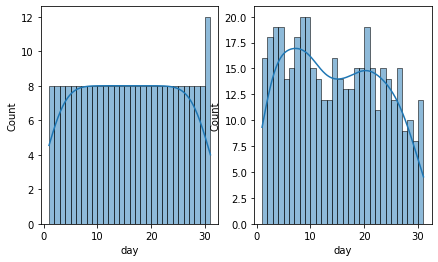

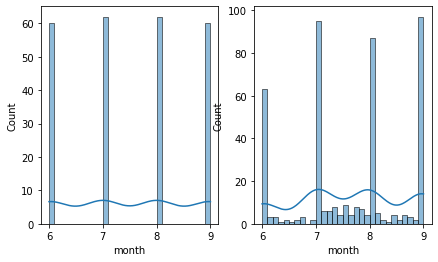

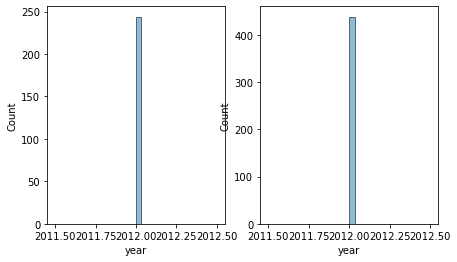

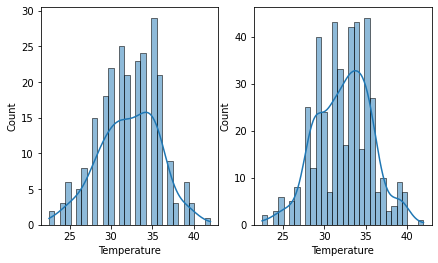

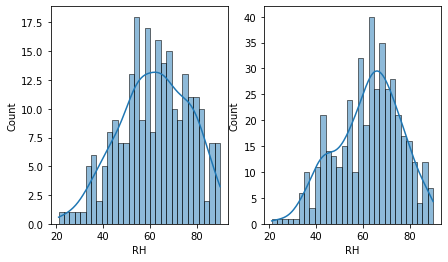

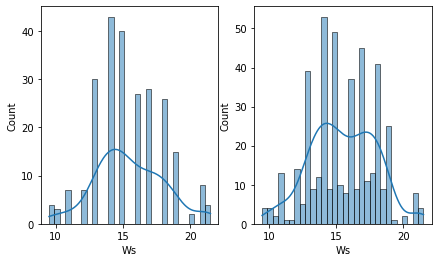

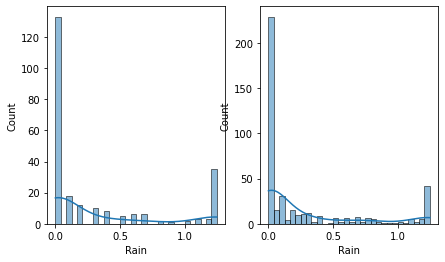

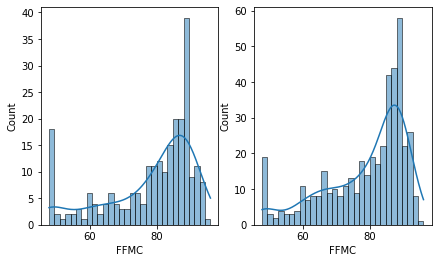

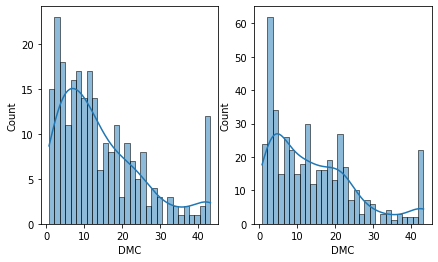

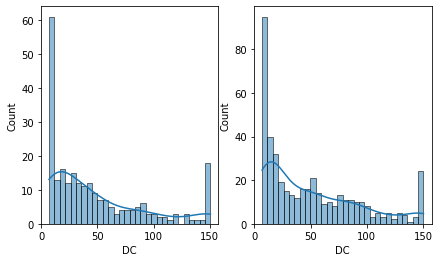

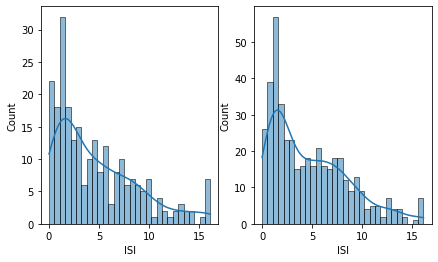

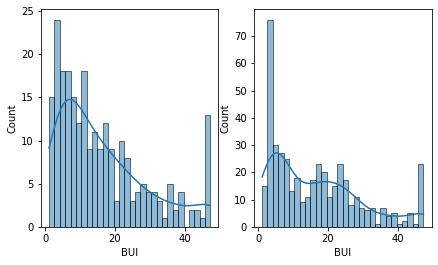

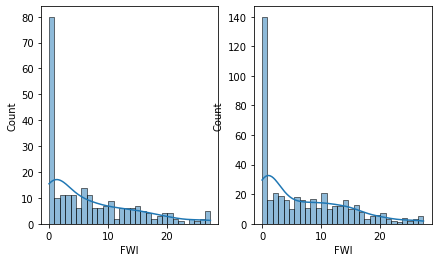

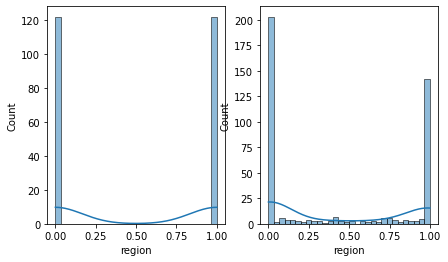

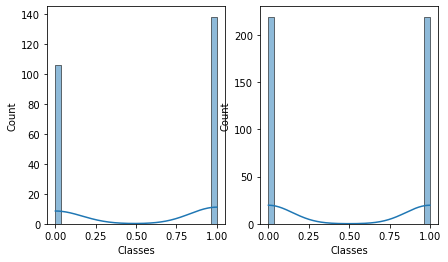

In [159]:
for i in numeric_col:
    plt.figure(figsize=(7,4))
    plt.subplot(121)
    sns.histplot(data=df,x=i,kde=True,bins=30)
    
    plt.subplot(122)
    sns.histplot(data=data_bal,x=i,kde=True,bins=30)

# Checking the outliers for Original and Balanced Dataset

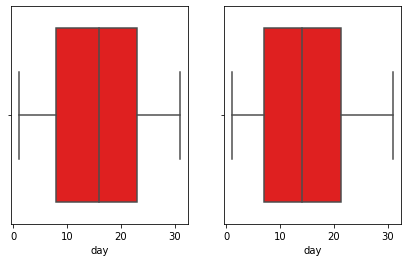

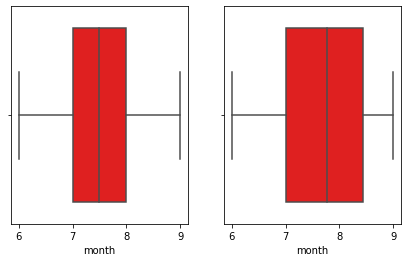

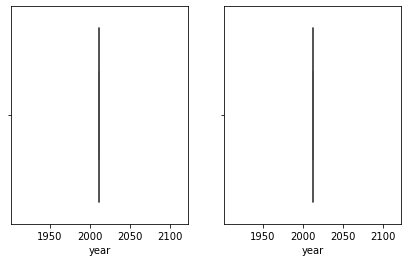

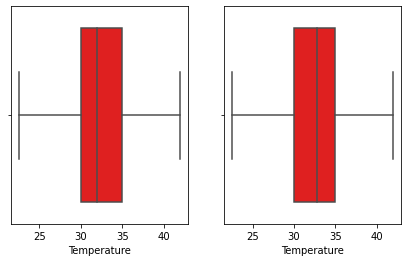

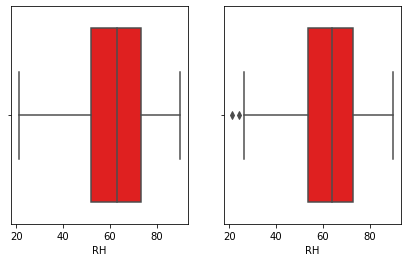

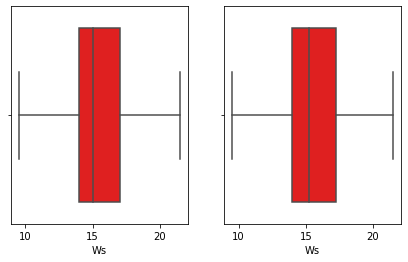

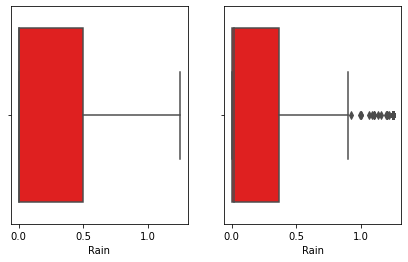

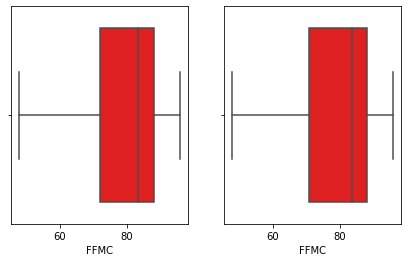

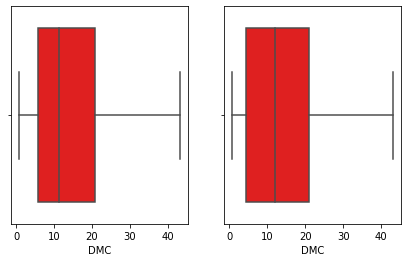

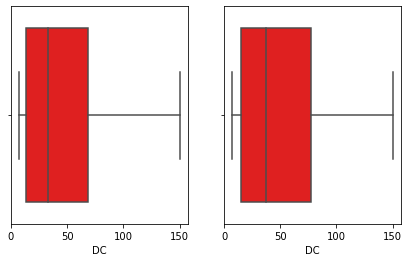

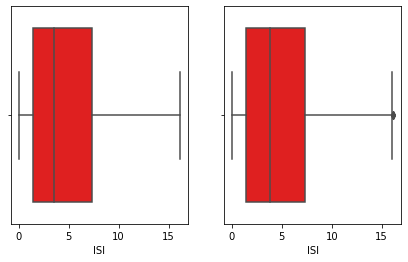

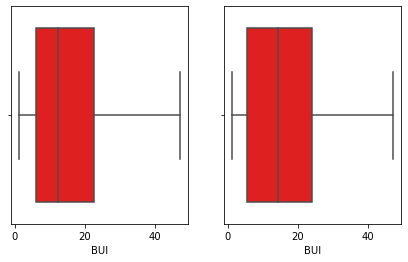

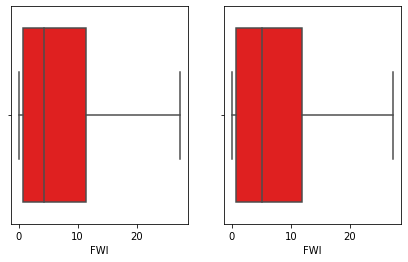

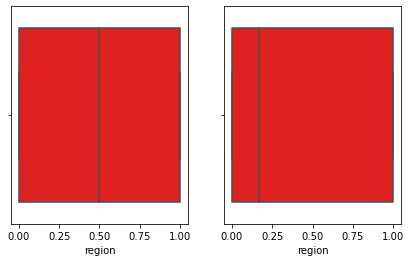

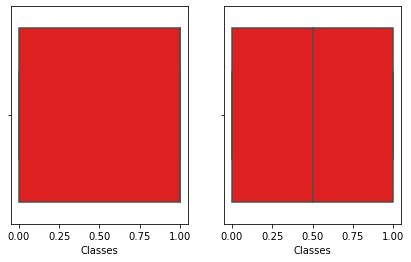

In [160]:
for i in numeric_col:
    plt.figure(figsize=(7,4))
    plt.subplot(121)
    sns.boxplot(data=df,x=i,color='r')
    
    plt.subplot(122)
    sns.boxplot(data=data_bal,x=i,color='r')

# Train Test split

In [161]:
from sklearn.model_selection import train_test_split
x_train1,x_test1,y_train1,y_test1 = train_test_split(x_bal,y_bal,test_size=0.30,random_state=16)

In [162]:
x_train1.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region
230,4.000000,8.000000,2012,34.00000,69.000000,13.000000,0.000000,85.000000,8.200000,19.800000,4.000000,8.200000,3.900000,0.000000
25,20.000000,6.000000,2012,30.00000,80.000000,16.000000,0.400000,59.800000,3.400000,27.100000,0.900000,5.100000,0.400000,0.000000
286,15.582227,6.104443,2012,29.00000,86.512598,15.069629,0.389556,48.456852,4.119927,8.268071,0.241777,4.058223,0.113926,0.965186
305,6.796300,7.440740,2012,32.88148,68.440740,13.559260,0.699075,74.709616,7.920370,13.871844,2.378146,7.752592,2.054442,0.000000
3,15.000000,8.000000,2012,36.00000,55.000000,13.000000,0.300000,82.400000,15.600000,92.500000,3.700000,22.000000,6.300000,0.000000


In [163]:

x_test1

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region
281,2.994640,6.664880,2012,29.886506,60.546026,16.670240,0.277033,64.414566,3.134048,7.888115,1.167024,3.244861,0.455675,0.000000
18,2.000000,9.000000,2012,22.500000,86.000000,15.000000,1.250000,47.737500,0.700000,7.000000,0.000000,1.100000,0.000000,0.000000
410,18.020841,7.997023,2012,35.985114,54.032749,18.000000,0.000000,89.384816,19.977671,110.833906,9.685412,27.473205,16.073800,0.000000
87,10.000000,8.000000,2012,35.000000,55.000000,14.000000,0.000000,88.900000,18.600000,67.000000,7.400000,21.900000,11.600000,0.000000
267,23.583499,7.000000,2012,31.000000,69.249504,17.291749,0.000000,86.424752,34.225588,95.994981,6.287326,38.331017,13.674256,0.708251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,16.000000,6.000000,2012,29.000000,89.000000,13.000000,0.700000,47.737500,1.700000,7.600000,0.000000,2.200000,0.000000,0.000000
370,1.781936,6.781936,2012,29.000000,61.170327,17.739355,0.026065,66.403743,3.009032,9.711228,1.326065,3.269677,0.500000,0.000000
32,20.000000,7.000000,2012,36.000000,50.000000,16.000000,0.000000,89.900000,32.700000,71.000000,9.500000,32.600000,17.300000,1.000000
316,11.177785,8.000000,2012,35.177785,62.217747,12.893329,0.003556,89.010227,21.732001,76.576872,7.185337,25.453776,12.196004,0.035557


In [164]:
y_train1

230    0.0
25     1.0
286    0.0
305    0.0
3      1.0
      ... 
321    0.0
69     1.0
121    1.0
238    0.0
169    1.0
Name: Classes, Length: 306, dtype: float64

In [165]:
y_test1

281    0.0
18     1.0
410    0.0
87     1.0
267    0.0
      ... 
156    1.0
370    0.0
32     1.0
316    0.0
102    1.0
Name: Classes, Length: 132, dtype: float64

In [166]:
x_train1.shape,y_train1.shape

((306, 14), (306,))

In [167]:
x_test1.shape,y_test1.shape

((132, 14), (132,))

# Standardization/Feature Scaling the dataset

In [168]:
x_train1 = scaler.fit_transform(x_train1)
x_train1

array([[-1.23191687,  0.42645242,  0.        , ..., -0.66193553,
        -0.47085993, -0.99258913],
       [ 0.6350389 , -1.51013804,  0.        , ..., -0.90517602,
        -0.96448838, -0.99258913],
       [ 0.11955226, -1.40900621,  0.        , ..., -0.98691874,
        -1.00483534,  1.09617279],
       ...,
       [-0.9985474 , -1.51013804,  0.        , ..., -0.57562438,
        -0.58368929,  1.17151475],
       [ 1.21846258, -0.54184281,  0.        , ...,  0.14625063,
         0.00866485, -0.99258913],
       [-1.46528634, -1.51013804,  0.        , ..., -1.07779831,
        -0.99269572,  1.17151475]])

In [169]:
x_test1 = scaler.transform(x_test1)
x_test1

array([[-1.34922709, -0.86633806,  0.        , ..., -1.05073887,
        -0.9566362 , -0.99258913],
       [-1.46528634,  1.39474765,  0.        , ..., -1.21903472,
        -1.02090306, -0.99258913],
       [ 0.4041012 ,  0.42356959,  0.        , ...,  0.85033026,
         1.2460927 , -0.99258913],
       ...,
       [ 0.6350389 , -0.54184281,  0.        , ...,  1.25260256,
         1.41903184,  1.17151475],
       [-0.39437895,  0.42645242,  0.        , ...,  0.69187641,
         0.69918106, -0.91564018],
       [-0.9985474 , -1.51013804,  0.        , ..., -0.75609314,
        -0.66831131, -0.99258913]])

# Logistic Regression

In [170]:
logistic_reg1=LogisticRegression()
logistic_reg1

LogisticRegression()

In [171]:
logistic_reg1.fit(x_train1,y_train1)

LogisticRegression()

In [172]:
logistic_reg_pred1=logistic_reg1.predict(x_test1)
logistic_reg_pred1

array([0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1.,
       0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0.,
       0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1.,
       1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0.])

# Performance Matrix

# Confusion Matrix

In [173]:
confusion_mat1=confusion_matrix(y_test1, logistic_reg_pred1)
confusion_mat1

array([[43, 31],
       [24, 34]], dtype=int64)

In [174]:
truly_positive=confusion_mat1[0][0]
falsely_positive=confusion_mat1[0][1]
falsely_negative=confusion_mat1[1][0]
truly_negative=confusion_mat1[1][1]

# Accuracy Score

In [175]:
accuracy1=round(accuracy_score(y_test1, logistic_reg_pred1),4)
accuracy1

0.5833

In [176]:
accuracy_manual1=round(((truly_positive+truly_negative)/(truly_positive+falsely_positive+falsely_negative+truly_negative)),4)
print("Accuracy of our model is {}".format(accuracy_manual1))

Accuracy of our model is 0.5833


# Precision Score

In [177]:
precision_manual1=round(truly_positive/(truly_positive+falsely_positive),4)
print("Precision of our model is {}".format(precision_manual1))

Precision of our model is 0.5811


# Recall Score

In [178]:
recall_manual1=round(truly_positive/(truly_positive+falsely_negative),4)
print("Recall of our model is {}".format(recall_manual1))

Recall of our model is 0.6418


# F-1 Score

In [179]:
f1_score1=2*(precision_manual1*recall_manual1)/(precision_manual1+recall_manual1)
print("F-1 Score of our model is {} ".format(round(f1_score1,4)))

F-1 Score of our model is 0.6099 


# Classification Report

In [180]:
print(classification_report(y_test1, logistic_reg_pred1))

              precision    recall  f1-score   support

         0.0       0.64      0.58      0.61        74
         1.0       0.52      0.59      0.55        58

    accuracy                           0.58       132
   macro avg       0.58      0.58      0.58       132
weighted avg       0.59      0.58      0.58       132



# Conclusion

# Performance of Logistic Regression Model for Original Dataset

In [181]:
print("The Performance of Model for Original dataset: \n{}".format(classification_report(y_test, logistic_reg_pred)))

The Performance of Model for Original dataset: 
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96        24
         1.0       1.00      0.95      0.97        37

    accuracy                           0.97        61
   macro avg       0.96      0.97      0.97        61
weighted avg       0.97      0.97      0.97        61



# Performance of Logistic Regression Model for Imbalanced Dataset

In [185]:
print("The Performance of Model for Imbalanced dataset: \n{}".format(classification_report(y_test1, logistic_reg_pred1)))

The Performance of Model for Imbalanced dataset: 
              precision    recall  f1-score   support

         0.0       0.64      0.58      0.61        74
         1.0       0.52      0.59      0.55        58

    accuracy                           0.58       132
   macro avg       0.58      0.58      0.58       132
weighted avg       0.59      0.58      0.58       132



# Observation:

Model is accurate when we use original dataset

 Model is very bad when we try to predict from balanced (created from an imbalanced dataset)